In [89]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf

height has been deprecated.



In [90]:
#df = pd.read_excel('NBA.xlsx',sheetname='COMBO')
df = pd.read_excel('Su.xlsx')
df.head()
df = df.reset_index(drop=True)
#df1.sort_values('Salary', ascending=False)

In [91]:
df = df.sort_values('Salary',ascending = False).groupby('Team').head(9)
df

,Name,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,Salary
213,LeBron James,14.000000,31.000000,73.000000,73.000000,36.500000,9.533333,18.433333,0.518667,1.500000,4.400000,0.342000,8.066667,14.000000,0.573333,0.560000,4.966667,7.133333,0.705000,1.166667,6.200000,7.333333,7.633333,1.400000,0.633333,3.766667,1.900000,25.666667,Cleveland Cavaliers,33285709
278,Paul Millsap,11.000000,30.000000,74.333333,73.666667,33.133333,6.166667,13.333333,0.462667,1.033333,3.133333,0.328667,5.133333,10.233333,0.503667,0.501333,3.933333,5.166667,0.760667,1.966667,6.200000,8.166667,3.366667,1.633333,1.166667,2.333333,2.800000,17.300000,Denver Nuggets,31269231
110,Gordon Hayward,7.000000,25.000000,76.333333,76.333333,35.033333,6.800000,15.033333,0.449667,1.800000,4.833333,0.370333,4.966667,10.200000,0.488000,0.509667,4.933333,6.000000,0.826667,0.733333,4.366667,5.100000,3.766667,1.200000,0.333333,2.366667,1.866667,20.300000,Boston Celtics,29727900
204,Kyle Lowry,11.000000,29.000000,69.000000,69.000000,36.300000,6.600000,15.266667,0.434333,2.633333,6.833333,0.379333,4.033333,8.433333,0.478667,0.520333,4.600000,5.666667,0.812667,0.766667,3.966667,4.733333,6.733333,1.733333,0.300000,2.766667,2.833333,20.466667,Toronto Raptors,28703704
300,Russell Westbrook,9.000000,27.000000,76.000000,76.000000,34.466667,9.266667,21.366667,0.435000,1.700000,5.266667,0.312667,7.566667,16.100000,0.473000,0.473333,7.566667,9.133333,0.830667,1.800000,6.800000,8.600000,9.800000,1.900000,0.300000,4.700000,2.500000,27.733333,Oklahoma City Thunder,28530608
70,DeMar DeRozan,8.000000,26.000000,70.666667,70.666667,35.433333,8.133333,18.366667,0.442000,0.466667,1.666667,0.296000,7.666667,16.700000,0.456000,0.455333,6.833333,8.100000,0.841333,0.800000,3.966667,4.766667,3.800000,1.100000,0.233333,2.300000,1.966667,23.633333,Toronto Raptors,27739975
3,Al Horford,10.000000,29.000000,75.333333,75.333333,31.633333,6.300000,12.433333,0.505333,0.833333,2.400000,0.335000,5.466667,10.033333,0.542667,0.539333,1.433333,1.833333,0.785667,1.633333,5.433333,7.100000,3.800000,0.833333,1.366667,1.433333,1.866667,14.800000,Boston Celtics,27734405
245,Mike Conley,9.000000,28.000000,65.000000,64.666667,32.133333,5.866667,13.200000,0.442667,1.800000,4.633333,0.385667,4.066667,8.600000,0.473000,0.509667,3.700000,4.333333,0.850667,0.433333,2.700000,3.133333,5.933333,1.266667,0.266667,2.000000,1.866667,17.200000,Memphis Grizzlies,26540100
138,James Harden,7.000000,26.000000,81.333333,81.333333,37.100000,8.333333,18.900000,0.439667,2.900000,8.066667,0.360333,5.433333,10.866667,0.501333,0.516000,8.933333,10.433333,0.858333,0.966667,5.666667,6.633333,8.566667,1.700000,0.600000,4.766667,2.700000,28.500000,Houston Rockets,26540100
194,Kevin Durant,9.000000,27.000000,53.666667,53.666667,34.333333,9.133333,17.666667,0.517333,2.300000,5.866667,0.388333,6.833333,11.800000,0.580667,0.581667,5.666667,6.466667,0.875667,0.600000,7.066667,7.700000,4.633333,1.000000,1.233333,2.800000,1.766667,26.233333,Golden State Warrior,26540100


In [92]:
#dff = df.nlargest(9,'Salary')
df.Team.value_counts()



Houston Rockets           9
Utah Jazz                 9
Dallas Mavericks          9
Portland Trail Blazers    9
Chicago Bulls             9
Orlando Magic             9
Detroit Pistons           9
New Orleans Pelicans      9
Golden State Warrior      9
Cleveland Cavaliers       9
Oklahoma City Thunder     9
New York Knicks           9
Milwaukee Bucks           9
Los Angeles Clippers      9
Toronto Raptors           9
Miami Heat                9
Minnesota Timberwolves    9
Philadelphia 76ers        9
Charlotte Hornets         9
Boston Celtics            9
Atlanta Hawks             9
Indiana Pacers            9
Denver Nuggets            9
Brooklyn Nets             9
Los Angeles Lakers        9
Phoenix Suns              9
Washington Wizards        9
Memphis Grizzlies         9
Sacramento Kings          8
SAN ANTONIO               6
Name: Team, dtype: int64

In [93]:
df.dtypes
#df = pd.DataFrame(Shoots,Exp,Season,Tm,Lg,Pos, dtype='float')
df[['Salary']] = df[['Salary']].astype(float)

In [94]:
df.describe()

,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02
mean,6.363409,26.091479,65.406642,36.497494,24.410589,3.966416,8.706642,0.455270,0.908459,2.529323,0.281769,3.059211,6.176629,0.489417,0.505907,1.857769,2.441729,0.742476,1.085213,3.438784,4.519862,2.250564,0.800815,0.513158,1.406266,2.023183,10.669424,1.015523e+07
std,3.818763,3.956390,12.248696,26.024625,6.966635,1.932884,4.139017,0.062386,0.755667,1.970585,0.128114,1.753343,3.440641,0.057893,0.047555,1.433172,1.763572,0.109367,0.840681,1.730308,2.437694,1.830831,0.390504,0.472702,0.764698,0.553233,5.462429,7.442047e+06
min,1.000000,19.000000,7.666667,0.000000,4.833333,0.466667,1.766667,0.236500,0.000000,0.000000,0.000000,0.233333,1.000000,0.207333,0.271500,0.000000,0.000000,0.000000,0.100000,0.300000,0.566667,0.133333,0.133333,0.000000,0.250000,0.366667,1.133333,5.109210e+05
25%,3.000000,23.000000,58.333333,12.000000,19.316667,2.500000,5.537500,0.413667,0.266667,0.775000,0.249083,1.733333,3.508333,0.461083,0.482083,0.866667,1.208333,0.693000,0.466667,2.200000,2.766667,1.000000,0.500000,0.200000,0.837500,1.650000,6.600000,4.054650e+06
50%,6.000000,26.000000,68.000000,33.750000,24.683333,3.500000,7.900000,0.444000,0.850000,2.450000,0.336000,2.666667,5.200000,0.487167,0.507500,1.400000,1.966667,0.762000,0.800000,3.016667,3.766667,1.700000,0.716667,0.358333,1.233333,2.000000,9.383333,7.890004e+06
75%,8.875000,28.750000,74.333333,59.250000,30.316667,5.325000,11.691667,0.490083,1.391667,3.825000,0.366667,4.091667,8.458333,0.521250,0.527750,2.300000,3.062500,0.815917,1.437500,4.225000,5.766667,2.908333,1.000000,0.633333,1.766667,2.400000,14.033333,1.424034e+07
max,18.000000,39.000000,82.000000,82.000000,37.533333,9.633333,21.366667,0.709000,4.266667,9.766667,0.447000,9.233333,17.666667,0.711333,0.709333,8.933333,10.433333,0.928000,4.833333,10.166667,14.200000,10.300000,2.000000,2.800000,4.766667,3.866667,28.500000,3.328571e+07


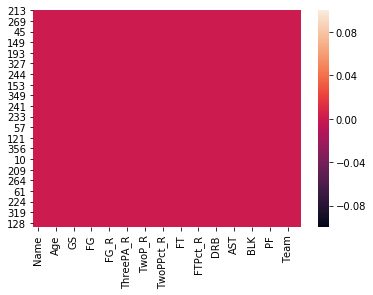

In [95]:
sb.heatmap(df.isnull())

# Create a function to drop Injured or Not playing players from each team

In [96]:
dfgrouped = pd.DataFrame()
dfgrouped = df.groupby(['Name']).agg(['mean'])
dfgrouped.head()

,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,3.0,20.0,68.333333,39.000000,23.200000,3.466667,7.533333,0.458000,0.600000,2.033333,0.285000,2.900000,5.500000,0.519667,0.495333,1.533333,2.166667,0.702667,1.500000,3.566667,5.066667,1.400000,0.666667,0.566667,0.900000,2.000000,9.033333,5504420.0
Al Horford,10.0,29.0,75.333333,75.333333,31.633333,6.300000,12.433333,0.505333,0.833333,2.400000,0.335000,5.466667,10.033333,0.542667,0.539333,1.433333,1.833333,0.785667,1.633333,5.433333,7.100000,3.800000,0.833333,1.366667,1.433333,1.866667,14.800000,27734405.0
Al Jefferson,13.0,31.0,59.333333,26.666667,22.666667,5.433333,11.100000,0.488333,0.000000,0.033333,0.133333,5.400000,11.100000,0.489000,0.488667,1.400000,2.066667,0.689667,1.266667,5.066667,6.333333,1.366667,0.533333,0.800000,0.733333,2.166667,12.233333,9769821.0
Al-Farouq Aminu,7.0,25.0,72.333333,36.666667,25.366667,2.866667,7.066667,0.407000,1.033333,3.166667,0.321667,1.833333,3.933333,0.466000,0.476667,1.366667,1.900000,0.718333,1.333333,4.700000,6.033333,1.366667,0.933333,0.700000,1.233333,1.900000,8.166667,7319035.0
Alan Anderson,7.0,33.0,39.000000,6.333333,16.233333,1.733333,4.366667,0.391333,0.800000,2.366667,0.330000,0.933333,2.000000,0.461000,0.482333,0.766667,1.033333,0.765000,0.200000,1.666667,1.900000,0.866667,0.400000,0.066667,0.400000,1.700000,5.100000,1315448.0


In [97]:
df.corr()

,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
Exp,1.000000,0.885062,0.083743,0.187123,0.238072,0.190675,0.181878,0.088090,0.156757,0.146376,-0.010777,0.141133,0.135755,0.081501,0.172730,0.130537,0.122307,0.139628,0.054177,0.179177,0.144406,0.162987,0.128055,-0.014406,0.087628,0.031433,0.191398,0.253277
Age,0.885062,1.000000,0.028789,0.019113,0.051046,-0.006156,-0.007860,0.046088,0.109852,0.094040,-0.046405,-0.055699,-0.062745,0.064765,0.166888,-0.017710,-0.036986,0.145495,-0.042544,0.043113,0.014704,0.066782,0.027246,-0.092700,-0.060472,-0.054528,0.009002,0.103770
G,0.083743,0.028789,1.000000,0.478489,0.460989,0.325393,0.307350,0.181189,0.199340,0.209359,0.065980,0.272906,0.249642,0.328705,0.281068,0.206497,0.210071,0.303790,0.179867,0.300508,0.274618,0.186438,0.254747,0.134536,0.227669,0.302423,0.309512,0.332782
GS,0.187123,0.019113,0.478489,1.000000,0.822180,0.723463,0.684810,0.226065,0.290900,0.285303,0.066508,0.673077,0.660822,0.221086,0.227202,0.576369,0.599084,0.145493,0.387625,0.626420,0.578075,0.418211,0.547356,0.369578,0.583213,0.540136,0.696889,0.640592
MP,0.238072,0.051046,0.460989,0.822180,1.000000,0.858472,0.864502,0.083545,0.478792,0.490350,0.262488,0.740899,0.759642,0.118749,0.163795,0.705258,0.702913,0.353871,0.237621,0.591215,0.500816,0.595219,0.696001,0.249840,0.719784,0.529765,0.851426,0.665416
FG,0.190675,-0.006156,0.325393,0.723463,0.858472,1.000000,0.973767,0.167191,0.423761,0.423806,0.214527,0.920759,0.929678,0.145425,0.164778,0.839953,0.825671,0.358801,0.252964,0.590072,0.505265,0.584972,0.573258,0.299661,0.790606,0.448606,0.980743,0.672944
FGA,0.181878,-0.007860,0.307350,0.684810,0.864502,0.973767,1.000000,-0.030945,0.551225,0.564090,0.333990,0.837103,0.880872,-0.027781,0.017160,0.835083,0.793343,0.446097,0.093868,0.478708,0.371151,0.650545,0.616014,0.160487,0.810439,0.390351,0.976157,0.620994
FG_R,0.088090,0.046088,0.181189,0.226065,0.083545,0.167191,-0.030945,1.000000,-0.464493,-0.510886,-0.572007,0.383958,0.255542,0.894152,0.804825,0.119223,0.227561,-0.222757,0.688548,0.484599,0.582021,-0.186957,-0.099285,0.575824,0.017358,0.364101,0.090121,0.274584
ThreeP_R,0.156757,0.109852,0.199340,0.290900,0.478792,0.423761,0.551225,-0.464493,1.000000,0.990828,0.648705,0.037174,0.095783,-0.297146,0.012487,0.331570,0.218395,0.566863,-0.486688,-0.109181,-0.246808,0.436398,0.422229,-0.324085,0.360860,-0.019657,0.519115,0.265933
ThreePA_R,0.146376,0.094040,0.209359,0.285303,0.490350,0.423806,0.564090,-0.510886,0.990828,1.000000,0.658628,0.040981,0.106105,-0.321227,-0.050914,0.346704,0.233169,0.566549,-0.500686,-0.106348,-0.249666,0.463593,0.446708,-0.336743,0.385316,-0.014834,0.520973,0.252122


Text(0.5,1,'NBA.corr()')

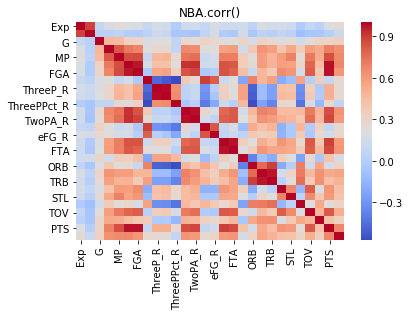

In [98]:
sb.heatmap(df.corr(),cmap='coolwarm')
plt.title('NBA.corr()')

In [99]:
# Reading Team Score of the Last 3 years
Team_Score = pd.read_excel('Team Score.xlsx',sheetname='Sheet2')
Team_Score.head()

,Team,Team Stats 2014,Team Stats 2015,Team Stats 2016
0,Atlanta,0.694,0.565,0.511
1,Boston,0.465,0.568,0.620
2,Brooklyn,0.455,0.256,0.244
3,Charlotte,0.402,0.573,0.439
4,Chicago,0.596,0.512,0.489


In [100]:
Team_Score['Team_Score_Sum'] = Team_Score['Team Stats 2014']+Team_Score['Team Stats 2015']+Team_Score['Team Stats 2016']
Team_Score = Team_Score.sort_values('Team', ascending=True)
Team_Score.head(30)

,Team,Team Stats 2014,Team Stats 2015,Team Stats 2016,Team_Score_Sum
0,Atlanta,0.694,0.565,0.511,1.770
1,Boston,0.465,0.568,0.620,1.653
2,Brooklyn,0.455,0.256,0.244,0.955
3,Charlotte,0.402,0.573,0.439,1.414
4,Chicago,0.596,0.512,0.489,1.597
5,Cleveland,0.657,0.709,0.640,2.006
6,Dallas,0.586,0.494,0.402,1.482
7,Denver,0.366,0.402,0.488,1.256
8,Detroit,0.390,0.512,0.451,1.353
9,Golden State,0.806,0.830,0.838,2.474


In [101]:
Team_Score = Team_Score.sort_values('Team_Score_Sum', ascending=False)
Team_Score.head(30)

,Team,Team Stats 2014,Team Stats 2015,Team Stats 2016,Team_Score_Sum
9,Golden State,0.806,0.830,0.838,2.474
26,San Antonio,0.652,0.793,0.704,2.149
5,Cleveland,0.657,0.709,0.640,2.006
12,LA Clippers,0.656,0.625,0.607,1.888
27,Toronto,0.570,0.647,0.598,1.815
10,Houston,0.657,0.483,0.656,1.796
0,Atlanta,0.694,0.565,0.511,1.770
20,Okla City,0.549,0.660,0.552,1.761
14,Memphis,0.656,0.488,0.511,1.655
29,Washington,0.565,0.500,0.590,1.655


In [102]:
Team_Score.describe()

,Team Stats 2014,Team Stats 2015,Team Stats 2016,Team_Score_Sum
count,30.000000,30.000000,30.000000,30.000000
mean,0.490733,0.489833,0.492100,1.472667
std,0.156793,0.160018,0.132172,0.411022
min,0.195000,0.122000,0.244000,0.684000
25%,0.393000,0.402000,0.393000,1.173500
50%,0.482500,0.497000,0.488500,1.507000
75%,0.597500,0.571750,0.590750,1.734500
max,0.806000,0.830000,0.838000,2.474000


In [103]:
def Team_Score(data):
#    Salary = data[0]
#    data = data[]
   
    if data == 'Atlanta Hawks':
        
    
            return 1.770  
    
    
    if data == 'Boston Celtics':
            
            return 1.653
        
        
    if data == 'Brooklyn Nets':
      
        
            return 0.955
        
    if data == 'Charlotte Hornets':        
   
        
            return 1.414
      
    if data == 'Chicago Bulls':
       
        
            return 1.597
       
    if data == 'Cleveland Cavaliers':
         
        
            return 2.006
       
    if data == 'Dallas Mavericks':
       
        
            return 1.482
        
    if data == 'Denver Nuggets':
        
        
            return 1.256
        
    if data == 'Detroit Pistons':
         
        
            return 1.353
        
    if data == 'Golden State Warrior':
        
        
            return 2.474
         
    if data == 'Houston Rockets':
        
        
            return 1.796
        
    if data == 'Indiana Pacers':
       
       
            return 1.49
       
    if data == 'Los Angeles Clippers':
        
        
            return 1.888
        
    if data == 'Los Angeles Lakers':
        
      
            return 0.78
        
    if data == 'Memphis Grizzlies':   
       
        
            return 1.655
       
    if data == 'Miami Heat':
   
       
            return 1.524
     
    if data == 'Milwaukee Bucks':
       
       
            return 1.391
     
    if data == 'Minnesota Timberwolves':   
     
       
            return 0.927
        
    if data == 'New Orleans Pelicans':
        
       
            return 1.304
        
    if data == 'New York Knicks':
         
       
            return 0.975
         
    if data == 'Oklahoma City Thunder':
        
       
            return 1.761
        
    if data == 'Orlando Magic':
     
        
            return 1.086
   
    if data == 'Philadelphia 76ers':
    
        
            return 0.684
        
    if data == 'Phoenix Suns':
        
        
            return 1.05
         
    if data == 'Portland Trail Blazers':
       
        
            return 1.602
        
    if data == 'Sacramento Kings':
       
        
            return 1.146
    if data == 'SAN ANTONIO':
       
        
            return 2.149  
    if data == 'Toronto Raptors':
       
      
            return 1.815
         
    if data == 'Utah Jazz':
       
        
            return 1.542
         
    if data == 'Washington Wizards':
      
       
            return 1.655
         
    else:
        return 99999 
    
    

In [104]:
df['Team_Score'] = df['Team'].apply(Team_Score)
df.Team_Score.value_counts()
df.head(30)

,Name,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,Salary,Team_Score
213,LeBron James,14.0,31.0,73.000000,73.000000,36.500000,9.533333,18.433333,0.518667,1.500000,4.400000,0.342000,8.066667,14.000000,0.573333,0.560000,4.966667,7.133333,0.705000,1.166667,6.200000,7.333333,7.633333,1.400000,0.633333,3.766667,1.900000,25.666667,Cleveland Cavaliers,33285709.0,2.006
278,Paul Millsap,11.0,30.0,74.333333,73.666667,33.133333,6.166667,13.333333,0.462667,1.033333,3.133333,0.328667,5.133333,10.233333,0.503667,0.501333,3.933333,5.166667,0.760667,1.966667,6.200000,8.166667,3.366667,1.633333,1.166667,2.333333,2.800000,17.300000,Denver Nuggets,31269231.0,1.256
110,Gordon Hayward,7.0,25.0,76.333333,76.333333,35.033333,6.800000,15.033333,0.449667,1.800000,4.833333,0.370333,4.966667,10.200000,0.488000,0.509667,4.933333,6.000000,0.826667,0.733333,4.366667,5.100000,3.766667,1.200000,0.333333,2.366667,1.866667,20.300000,Boston Celtics,29727900.0,1.653
204,Kyle Lowry,11.0,29.0,69.000000,69.000000,36.300000,6.600000,15.266667,0.434333,2.633333,6.833333,0.379333,4.033333,8.433333,0.478667,0.520333,4.600000,5.666667,0.812667,0.766667,3.966667,4.733333,6.733333,1.733333,0.300000,2.766667,2.833333,20.466667,Toronto Raptors,28703704.0,1.815
300,Russell Westbrook,9.0,27.0,76.000000,76.000000,34.466667,9.266667,21.366667,0.435000,1.700000,5.266667,0.312667,7.566667,16.100000,0.473000,0.473333,7.566667,9.133333,0.830667,1.800000,6.800000,8.600000,9.800000,1.900000,0.300000,4.700000,2.500000,27.733333,Oklahoma City Thunder,28530608.0,1.761
70,DeMar DeRozan,8.0,26.0,70.666667,70.666667,35.433333,8.133333,18.366667,0.442000,0.466667,1.666667,0.296000,7.666667,16.700000,0.456000,0.455333,6.833333,8.100000,0.841333,0.800000,3.966667,4.766667,3.800000,1.100000,0.233333,2.300000,1.966667,23.633333,Toronto Raptors,27739975.0,1.815
3,Al Horford,10.0,29.0,75.333333,75.333333,31.633333,6.300000,12.433333,0.505333,0.833333,2.400000,0.335000,5.466667,10.033333,0.542667,0.539333,1.433333,1.833333,0.785667,1.633333,5.433333,7.100000,3.800000,0.833333,1.366667,1.433333,1.866667,14.800000,Boston Celtics,27734405.0,1.653
245,Mike Conley,9.0,28.0,65.000000,64.666667,32.133333,5.866667,13.200000,0.442667,1.800000,4.633333,0.385667,4.066667,8.600000,0.473000,0.509667,3.700000,4.333333,0.850667,0.433333,2.700000,3.133333,5.933333,1.266667,0.266667,2.000000,1.866667,17.200000,Memphis Grizzlies,26540100.0,1.655
138,James Harden,7.0,26.0,81.333333,81.333333,37.100000,8.333333,18.900000,0.439667,2.900000,8.066667,0.360333,5.433333,10.866667,0.501333,0.516000,8.933333,10.433333,0.858333,0.966667,5.666667,6.633333,8.566667,1.700000,0.600000,4.766667,2.700000,28.500000,Houston Rockets,26540100.0,1.796
194,Kevin Durant,9.0,27.0,53.666667,53.666667,34.333333,9.133333,17.666667,0.517333,2.300000,5.866667,0.388333,6.833333,11.800000,0.580667,0.581667,5.666667,6.466667,0.875667,0.600000,7.066667,7.700000,4.633333,1.000000,1.233333,2.800000,1.766667,26.233333,Golden State Warrior,26540100.0,2.474


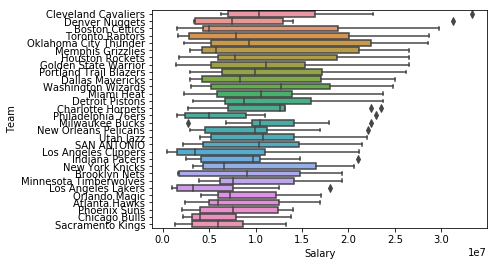

In [105]:
sb.boxplot(x='Salary', y ='Team', data = df)

In [106]:
# Scoring based on Salary
#grp = df.groupby('Salary')

maxum = df.max()
Sal_max = maxum['Salary']
Sal_max

mean = df.mean()
Sal_mean = mean['Salary']
Sal_mean
minn = df.min()
Sal_min = minn['Salary']
Sal_min  

        # Highest - Mean / 5

c1 = (Sal_max - Sal_mean)/5
c1

        # Mean - Lowest / 5

c2 = (Sal_mean - Sal_min)/5
c2
        
s1 = Sal_min+c2
s2 = Sal_min+2*c2
s3 = Sal_min+3*c2
s4 = Sal_min+4*c2
s5 = Sal_min+5*c2
s6 = Sal_mean+c1
s7 = Sal_mean+2*c1
s8 = Sal_mean+3*c1
s9 = Sal_mean+4*c1
s10= Sal_mean+5*c1

def Compute_Sal(data):
    Team = data[0]
    Salary = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if Salary >= Sal_min and Salary < s1:
                    
                return 1
            elif Salary > s1 and Salary < s2:
                return 2
            elif Salary > s2 and Salary < s3:
                return 3
            elif Salary > s3 and Salary < s4:
                return 4
            elif Salary > s4 and Salary < s5:
                return 5
            elif Salary > s5 and Salary < s6:
                return 6
            elif Salary > s6 and Salary < s7:
                return 7
            elif Salary > s7 and Salary < s8:
                return 8
            elif Salary > s8 and Salary < s9:
                return 9
            elif Salary > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
print(c1)  

4626095.29173


In [107]:
#merged_drop_dups.sort_values('Salary', axis=0, ascending=False,inplace=True)

In [108]:
df['Salary_Eval'] = df[['Team','Salary']].apply(Compute_Sal,axis=1)
df.Salary_Eval.value_counts()


6     49
2     47
3     35
7     29
1     29
4     27
8     22
5     13
9     11
10     4
Name: Salary_Eval, dtype: int64

In [109]:
# Scoring based on Exp
#grp = df.groupby('Exp')


def Compute_Exp(data):
    Team = data[0]
    Exp = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['Exp']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['Exp']
        Sal_mean

        minn = df.min()
        Sal_min = minn['Exp']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if Exp >= Sal_min and Exp < s1:
                    
                return 1
            elif Exp > s1 and Exp < s2:
                return 2
            elif Exp > s2 and Exp < s3:
                return 3
            elif Exp > s3 and Exp < s4:
                return 4
            elif Exp > s4 and Exp < s5:
                return 5
            elif Exp > s5 and Exp < s6:
                return 6
            elif Exp > s6 and Exp < s7:
                return 7
            elif Exp > s7 and Exp < s8:
                return 8
            elif Exp > s8 and Exp < s9:
                return 9
            elif Exp > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
  

In [110]:
df['Exp_Eval'] = df[['Team','Exp']].apply(Compute_Exp,axis=1)
df.Exp_Eval.value_counts()



6     47
1     41
7     36
4     30
5     27
3     27
2     27
8     16
9      9
10     6
Name: Exp_Eval, dtype: int64

In [111]:
# Scoring based on G
#grp = df.groupby('G')


def Compute_G(data):
    Team = data[0]
    G = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['G']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['G']
        Sal_mean

        minn = df.min()
        Sal_min = minn['G']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if G >= Sal_min and G < s1:
                    
                return 1
            elif G > s1 and G < s2:
                return 2
            elif G > s2 and G < s3:
                return 3
            elif G > s3 and G < s4:
                return 4
            elif G > s4 and G < s5:
                return 5
            elif G > s5 and G < s6:
                return 6
            elif G > s6 and G < s7:
                return 7
            elif G > s7 and G < s8:
                return 8
            elif G > s8 and G < s9:
                return 9
            elif G > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
   

In [112]:
df['G_Eval'] = df[['Team','G']].apply(Compute_G,axis=1)
df.G_Eval.value_counts()



5     70
8     38
7     33
6     33
9     32
4     25
10    22
3      8
2      3
1      2
Name: G_Eval, dtype: int64

In [113]:
# Scoring based on GS
#grp = df.groupby('GS')


def Compute_GS(data):
    Team = data[0]
    GS = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['GS']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['GS']
        Sal_mean

        minn = df.min()
        Sal_min = minn['GS']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if GS >= Sal_min and GS < s1:
                    
                return 1
            elif GS > s1 and GS < s2:
                return 2
            elif GS > s2 and GS < s3:
                return 3
            elif GS > s3 and GS < s4:
                return 4
            elif GS > s4 and GS < s5:
                return 5
            elif GS > s5 and GS < s6:
                return 6
            elif GS > s6 and GS < s7:
                return 7
            elif GS > s7 and GS < s8:
                return 8
            elif GS > s8 and GS < s9:
                return 9
            elif GS > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
   

In [114]:
df['GS_Eval'] = df[['Team','GS']].apply(Compute_GS,axis=1)
df.GS_Eval.value_counts()




1     48
2     34
7     29
10    28
9     27
8     25
4     22
6     20
3     19
5     14
Name: GS_Eval, dtype: int64

In [115]:
# Scoring based on MP
#grp = df.groupby('MP')


def Compute_MP(data):
    Team = data[0]
    MP = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['MP']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['MP']
        Sal_mean

        minn = df.min()
        Sal_min = minn['MP']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if MP >= Sal_min and MP < s1:
                    
                return 1
            elif MP > s1 and MP < s2:
                return 2
            elif MP > s2 and MP < s3:
                return 3
            elif MP > s3 and MP < s4:
                return 4
            elif MP > s4 and MP < s5:
                return 5
            elif MP > s5 and MP < s6:
                return 6
            elif MP > s6 and MP < s7:
                return 7
            elif MP > s7 and MP < s8:
                return 8
            elif MP > s8 and MP < s9:
                return 9
            elif MP > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
   

In [116]:
df['MP_Eval'] = df[['Team','MP']].apply(Compute_MP,axis=1)
df.MP_Eval.value_counts()



5     51
4     38
8     34
7     33
6     29
9     26
3     26
2     15
10    13
1      1
Name: MP_Eval, dtype: int64

In [117]:
# Scoring based on FGA
#grp = df.groupby('FGA')


def Compute_FGA(data):
    Team = data[0]
    FGA = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['FGA']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['FGA']
        Sal_mean

        minn = df.min()
        Sal_min = minn['FGA']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if FGA >= Sal_min and FGA < s1:
                    
                return 1
            elif FGA > s1 and FGA < s2:
                return 2
            elif FGA > s2 and FGA < s3:
                return 3
            elif FGA > s3 and FGA < s4:
                return 4
            elif FGA > s4 and FGA < s5:
                return 5
            elif FGA > s5 and FGA < s6:
                return 6
            elif FGA > s6 and FGA < s7:
                return 7
            elif FGA > s7 and FGA < s8:
                return 8
            elif FGA > s8 and FGA < s9:
                return 9
            elif FGA > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
print(c1)  

4626095.29173


In [118]:
df['FGA_Eval'] = df[['Team','FGA']].apply(Compute_FGA,axis=1)

df.FGA_Eval.value_counts()




3     46
7     41
5     37
6     36
4     35
2     26
8     19
9     11
1     11
10     4
Name: FGA_Eval, dtype: int64

In [119]:
# Scoring based on ThreeP_R
#grp = df.groupby('ThreeP_R')


def Compute_ThreeP_R(data):
    Team = data[0]
    ThreeP_R = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['ThreeP_R']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['ThreeP_R']
        Sal_mean

        minn = df.min()
        Sal_min = minn['ThreeP_R']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if ThreeP_R >= Sal_min and ThreeP_R < s1:
                    
                return 1
            elif ThreeP_R > s1 and ThreeP_R < s2:
                return 2
            elif ThreeP_R > s2 and ThreeP_R < s3:
                return 3
            elif ThreeP_R > s3 and ThreeP_R < s4:
                return 4
            elif ThreeP_R > s4 and ThreeP_R < s5:
                return 5
            elif ThreeP_R > s5 and ThreeP_R < s6:
                return 6
            elif ThreeP_R > s6 and ThreeP_R < s7:
                return 7
            elif ThreeP_R > s7 and ThreeP_R < s8:
                return 8
            elif ThreeP_R > s8 and ThreeP_R < s9:
                return 9
            elif ThreeP_R > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
   

In [120]:
df['ThreeP_R_Eval'] = df[['Team','ThreeP_R']].apply(Compute_ThreeP_R,axis=1)
df.ThreeP_R_Eval.value_counts()



6     82
1     62
7     32
3     27
5     20
4     15
8     13
2     13
10     1
9      1
Name: ThreeP_R_Eval, dtype: int64

In [121]:
# Scoring based on PTS
#grp = df.groupby('PTS')


def Compute_PTS(data):
    Team = data[0]
    PTS = data[1]
          
    grp = df.groupby('Team')
    for name,group in grp:
        
        maxum = df.max()
        Sal_max = maxum['PTS']
        Sal_max

        mean = df.mean()
        Sal_mean = mean['PTS']
        Sal_mean

        minn = df.min()
        Sal_min = minn['PTS']
        Sal_min  

        # Highest - Mean / 5

        c1 = (Sal_max - Sal_mean)/5
        c1

        # Mean - Lowest / 5

        c2 = (Sal_mean - Sal_min)/5
        c2
        
        s1 = Sal_min+c2
        s2 = Sal_min+2*c2
        s3 = Sal_min+3*c2
        s4 = Sal_min+4*c2
        s5 = Sal_min+5*c2
        s6 = Sal_mean+c1
        s7 = Sal_mean+2*c1
        s8 = Sal_mean+3*c1
        s9 = Sal_mean+4*c1
        s10= Sal_mean+5*c1
        
        
        
        
        
    
    
        if Team == 'Atlanta Hawks':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        
        if Team == 'Boston Celtics':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
        
        
        if Team == 'Brooklyn Nets':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Charlotte Hornets':        
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
        
        if Team == 'Chicago Bulls':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
        
        if Team == 'Cleveland Cavaliers':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
        
        if Team == 'Dallas Mavericks':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
        
        
        if Team == 'Denver Nuggets':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Detroit Pistons':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Golden State Warrior':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Houston Rockets':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Indiana Pacers':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Clippers':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Los Angeles Lakers':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Memphis Grizzlies':   
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Miami Heat':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Milwaukee Bucks':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Minnesota Timberwolves':   
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'New Orleans Pelicans':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'New York Knicks':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Oklahoma City Thunder':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Orlando Magic':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Philadelphia 76ers':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Phoenix Suns':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Portland Trail Blazers':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Sacramento Kings':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'SAN ANTONIO':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
            
        
        if Team == 'Toronto Raptors':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Utah Jazz':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
            
            
        
        if Team == 'Washington Wizards':
            if PTS >= Sal_min and PTS < s1:
                    
                return 1
            elif PTS > s1 and PTS < s2:
                return 2
            elif PTS > s2 and PTS < s3:
                return 3
            elif PTS > s3 and PTS < s4:
                return 4
            elif PTS > s4 and PTS < s5:
                return 5
            elif PTS > s5 and PTS < s6:
                return 6
            elif PTS > s6 and PTS < s7:
                return 7
            elif PTS > s7 and PTS < s8:
                return 8
            elif PTS > s8 and PTS < s9:
                return 9
            elif PTS > s9:
                return 10
    
    
      
         
    else:
        return 9999999 
   

In [122]:
df['PTS_Eval'] = df[['Team','PTS']].apply(Compute_PTS,axis=1)
df.PTS_Eval.value_counts()



3     54
6     44
4     40
5     39
7     35
2     20
8     13
9      9
10     7
1      5
Name: PTS_Eval, dtype: int64

In [123]:
df['Player_Score'] = df.apply(lambda row: row.Team_Score +
                                            row.Salary_Eval+
                                            row.Exp_Eval+
                                            row.G_Eval+
                                            row.GS_Eval+
                                            row.MP_Eval+
                                            row.FGA_Eval+
                                            row.ThreeP_R_Eval+
                                            row.PTS_Eval
                                            ,axis=1)

                                            

In [124]:
df.head(20)

,Name,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,Salary,Team_Score,Salary_Eval,Exp_Eval,G_Eval,GS_Eval,MP_Eval,FGA_Eval,ThreeP_R_Eval,PTS_Eval,Player_Score
213,LeBron James,14.0,31.0,73.000000,73.000000,36.500000,9.533333,18.433333,0.518667,1.500000,4.400000,0.342000,8.066667,14.000000,0.573333,0.560000,4.966667,7.133333,0.705000,1.166667,6.200000,7.333333,7.633333,1.400000,0.633333,3.766667,1.900000,25.666667,Cleveland Cavaliers,33285709.0,2.006,10,9,8,10,10,9,6,10,74.006
278,Paul Millsap,11.0,30.0,74.333333,73.666667,33.133333,6.166667,13.333333,0.462667,1.033333,3.133333,0.328667,5.133333,10.233333,0.503667,0.501333,3.933333,5.166667,0.760667,1.966667,6.200000,8.166667,3.366667,1.633333,1.166667,2.333333,2.800000,17.300000,Denver Nuggets,31269231.0,1.256,10,7,8,10,9,7,6,7,65.256
110,Gordon Hayward,7.0,25.0,76.333333,76.333333,35.033333,6.800000,15.033333,0.449667,1.800000,4.833333,0.370333,4.966667,10.200000,0.488000,0.509667,4.933333,6.000000,0.826667,0.733333,4.366667,5.100000,3.766667,1.200000,0.333333,2.366667,1.866667,20.300000,Boston Celtics,29727900.0,1.653,10,6,9,10,10,8,7,8,69.653
204,Kyle Lowry,11.0,29.0,69.000000,69.000000,36.300000,6.600000,15.266667,0.434333,2.633333,6.833333,0.379333,4.033333,8.433333,0.478667,0.520333,4.600000,5.666667,0.812667,0.766667,3.966667,4.733333,6.733333,1.733333,0.300000,2.766667,2.833333,20.466667,Toronto Raptors,28703704.0,1.815,10,7,7,9,10,8,8,8,68.815
300,Russell Westbrook,9.0,27.0,76.000000,76.000000,34.466667,9.266667,21.366667,0.435000,1.700000,5.266667,0.312667,7.566667,16.100000,0.473000,0.473333,7.566667,9.133333,0.830667,1.800000,6.800000,8.600000,9.800000,1.900000,0.300000,4.700000,2.500000,27.733333,Oklahoma City Thunder,28530608.0,1.761,9,7,9,10,9,10,7,10,72.761
70,DeMar DeRozan,8.0,26.0,70.666667,70.666667,35.433333,8.133333,18.366667,0.442000,0.466667,1.666667,0.296000,7.666667,16.700000,0.456000,0.455333,6.833333,8.100000,0.841333,0.800000,3.966667,4.766667,3.800000,1.100000,0.233333,2.300000,1.966667,23.633333,Toronto Raptors,27739975.0,1.815,9,6,7,9,10,9,3,9,63.815
3,Al Horford,10.0,29.0,75.333333,75.333333,31.633333,6.300000,12.433333,0.505333,0.833333,2.400000,0.335000,5.466667,10.033333,0.542667,0.539333,1.433333,1.833333,0.785667,1.633333,5.433333,7.100000,3.800000,0.833333,1.366667,1.433333,1.866667,14.800000,Boston Celtics,27734405.0,1.653,9,7,8,10,8,7,5,7,62.653
245,Mike Conley,9.0,28.0,65.000000,64.666667,32.133333,5.866667,13.200000,0.442667,1.800000,4.633333,0.385667,4.066667,8.600000,0.473000,0.509667,3.700000,4.333333,0.850667,0.433333,2.700000,3.133333,5.933333,1.266667,0.266667,2.000000,1.866667,17.200000,Memphis Grizzlies,26540100.0,1.655,9,7,5,9,8,7,7,7,60.655
138,James Harden,7.0,26.0,81.333333,81.333333,37.100000,8.333333,18.900000,0.439667,2.900000,8.066667,0.360333,5.433333,10.866667,0.501333,0.516000,8.933333,10.433333,0.858333,0.966667,5.666667,6.633333,8.566667,1.700000,0.600000,4.766667,2.700000,28.500000,Houston Rockets,26540100.0,1.796,9,6,10,10,10,10,8,10,74.796
194,Kevin Durant,9.0,27.0,53.666667,53.666667,34.333333,9.133333,17.666667,0.517333,2.300000,5.866667,0.388333,6.833333,11.800000,0.580667,0.581667,5.666667,6.466667,0.875667,0.600000,7.066667,7.700000,4.633333,1.000000,1.233333,2.800000,1.766667,26.233333,Golden State Warrior,26540100.0,2.474,9,7,4,7,9,9,8,10,65.474


In [125]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

player_count = df.groupby('Team')
bb = '##############################################'
x = 0
y = 0


for a,b in player_count:
    print('The name of the Team : ' +str(a))
    print('The Total Player Score is  : ' +str(b.Player_Score.sum()))
    print('The number of Players in the Team : ' +str(b.Name.count()))
    print(bb)
    if (b.Name.count()) < 12:
        x = x+1
        print('!!!!!!!!!!!!!!!!____Less_Player_Alert___!!!!!!!!!!!!!!!! :' +str(b.Name.count())+ ' Players only!!!')
        print(b.Name)
    elif(b.Name.count()) > 12:
        y =y+1  
        print('!!!!!!!!!!!!!!!!____More_Player_Alert___!!!!!!!!!!!!!!!! :' +str(b.Name.count())+ ' Players !!!')
        print(b.Name)
print(color.RED+'Total count of "Less Player" Alert is :'+color.BOLD+ str(x))
print(color.RED+'Total count of "More Player" Alert is :'+color.BOLD+ str(y))
print(color.RED+'Total count of "All" Alert is :'+color.BOLD+ str(x+y)) 
   
    
        
 

The name of the Team : Atlanta Hawks
The Total Player Score is  : 314.92999999999995
The number of Players in the Team : 9
##############################################
!!!!!!!!!!!!!!!!____Less_Player_Alert___!!!!!!!!!!!!!!!! :9 Players only!!!
193      Kent Bazemore
74     Dennis Schroder
248      Miles Plumlee
228    Marco Belinelli
100     Ersan Ilyasova
81      Dewayne Dedmon
246       Mike Muscala
221    Malcolm Delaney
322     Taurean Prince
Name: Name, dtype: object
The name of the Team : Boston Celtics
The Total Player Score is  : 392.87700000000007
The number of Players in the Team : 9
##############################################
!!!!!!!!!!!!!!!!____Less_Player_Alert___!!!!!!!!!!!!!!!! :9 Players only!!!
110    Gordon Hayward
3          Al Horford
207      Kyrie Irving
230     Marcus Morris
147      Jaylen Brown
231      Marcus Smart
22        Aron Baynes
325      Terry Rozier
309      Shane Larkin
Name: Name, dtype: object
The name of the Team : Brooklyn Nets
The Total Pla

In [126]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

check_df_9_player = df.groupby('Team')
bb = '##############################################'
x = 0
y = 0


for a,b in check_df_9_player:
    
    print('The name of the Team : ' +str(a))
    print('The smallest salary is  : ' +str(b.Salary.nsmallest(6)))
    print('The Names are : ' +str(b.Name))
    print('The number of Players in the Team : ' +str(b.Name.count()))
    print(bb)
    if (b.Name.count()) < 12:
        x = x+1
        print('!!!!!!!!!!!!!!!!____Less_Player_Alert___!!!!!!!!!!!!!!!! :' +str(b.Name.count())+ ' Players only!!!')
        print(b.Name)
    elif(b.Name.count()) > 12:
        y =y+1  
        print('!!!!!!!!!!!!!!!!____More_Player_Alert___!!!!!!!!!!!!!!!! :' +str(b.Name.count())+ ' Players !!!')
        print(b.Name)
print(color.RED+'Total count of "Less Player" Alert is :'+color.BOLD+ str(x))
print(color.RED+'Total count of "More Player" Alert is :'+color.BOLD+ str(y))
print(color.RED+'Total count of "All" Alert is :'+color.BOLD+ str(x+y)) 
   
    
        
 

The name of the Team : Atlanta Hawks
The smallest salary is  : 322    2422560.0
221    2500000.0
246    5000000.0
100    6000000.0
81     6000000.0
228    6606060.0
Name: Salary, dtype: float64
The Names are : 193      Kent Bazemore
74     Dennis Schroder
248      Miles Plumlee
228    Marco Belinelli
100     Ersan Ilyasova
81      Dewayne Dedmon
246       Mike Muscala
221    Malcolm Delaney
322     Taurean Prince
Name: Name, dtype: object
The number of Players in the Team : 9
##############################################
!!!!!!!!!!!!!!!!____Less_Player_Alert___!!!!!!!!!!!!!!!! :9 Players only!!!
193      Kent Bazemore
74     Dennis Schroder
248      Miles Plumlee
228    Marco Belinelli
100     Ersan Ilyasova
81      Dewayne Dedmon
246       Mike Muscala
221    Malcolm Delaney
322     Taurean Prince
Name: Name, dtype: object
The name of the Team : Boston Celtics
The smallest salary is  : 309    1524305.0
325    1988520.0
22     4328000.0
231    4538020.0
147    4956480.0
230    5000000

The number of Players in the Team : 9
##############################################
!!!!!!!!!!!!!!!!____Less_Player_Alert___!!!!!!!!!!!!!!!! :9 Players only!!!
114    Hassan Whiteside
109        Goran Dragic
139       James Johnson
82         Dion Waiters
189        Kelly Olynyk
355     Wayne Ellington
347       Tyler Johnson
184     Justise Winslow
352       Udonis Haslem
Name: Name, dtype: object
The name of the Team : Milwaukee Bucks
The smallest salary is  : 329     2684160.0
129     6782392.0
238     9607500.0
338     9821429.0
250    10500000.0
164    11422536.0
Name: Salary, dtype: float64
The Names are : 107    Giannis Antetokounmpo
112              Greg Monroe
197          Khris Middleton
164              John Henson
250          Mirza Teletovic
338               Tony Snell
238      Matthew Dellavedova
129            Jabari Parker
329               Thon Maker
Name: Name, dtype: object
The number of Players in the Team : 9
##############################################
!!!!!!!

# SAN ANTINIO add points

In [127]:
df_9_player_repl = pd.concat([df]*41, ignore_index=True)
df_9_player_repl.count()
df_9_player_repl.head(5)

,Name,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,Salary,Team_Score,Salary_Eval,Exp_Eval,G_Eval,GS_Eval,MP_Eval,FGA_Eval,ThreeP_R_Eval,PTS_Eval,Player_Score
0,LeBron James,14.0,31.0,73.000000,73.000000,36.500000,9.533333,18.433333,0.518667,1.500000,4.400000,0.342000,8.066667,14.000000,0.573333,0.560000,4.966667,7.133333,0.705000,1.166667,6.200000,7.333333,7.633333,1.400000,0.633333,3.766667,1.900000,25.666667,Cleveland Cavaliers,33285709.0,2.006,10,9,8,10,10,9,6,10,74.006
1,Paul Millsap,11.0,30.0,74.333333,73.666667,33.133333,6.166667,13.333333,0.462667,1.033333,3.133333,0.328667,5.133333,10.233333,0.503667,0.501333,3.933333,5.166667,0.760667,1.966667,6.200000,8.166667,3.366667,1.633333,1.166667,2.333333,2.800000,17.300000,Denver Nuggets,31269231.0,1.256,10,7,8,10,9,7,6,7,65.256
2,Gordon Hayward,7.0,25.0,76.333333,76.333333,35.033333,6.800000,15.033333,0.449667,1.800000,4.833333,0.370333,4.966667,10.200000,0.488000,0.509667,4.933333,6.000000,0.826667,0.733333,4.366667,5.100000,3.766667,1.200000,0.333333,2.366667,1.866667,20.300000,Boston Celtics,29727900.0,1.653,10,6,9,10,10,8,7,8,69.653
3,Kyle Lowry,11.0,29.0,69.000000,69.000000,36.300000,6.600000,15.266667,0.434333,2.633333,6.833333,0.379333,4.033333,8.433333,0.478667,0.520333,4.600000,5.666667,0.812667,0.766667,3.966667,4.733333,6.733333,1.733333,0.300000,2.766667,2.833333,20.466667,Toronto Raptors,28703704.0,1.815,10,7,7,9,10,8,8,8,68.815
4,Russell Westbrook,9.0,27.0,76.000000,76.000000,34.466667,9.266667,21.366667,0.435000,1.700000,5.266667,0.312667,7.566667,16.100000,0.473000,0.473333,7.566667,9.133333,0.830667,1.800000,6.800000,8.600000,9.800000,1.900000,0.300000,4.700000,2.500000,27.733333,Oklahoma City Thunder,28530608.0,1.761,9,7,9,10,9,10,7,10,72.761


In [128]:
df_team_score = df.groupby(['Team'], as_index=False)['Player_Score'].sum()
df_team_score.to_excel('Team_Score.xlsx')

In [129]:
df_team_mean = df.groupby(('Team'),as_index=False).mean()
df_team_mean.head(30)
#df_team_mean.to_excel('Team_Mean.xlsx')
df_team_mean.to_excel('Final_score.xlsx')

In [130]:
NBA_Schedule_List_1 = pd.read_excel('NBA Schedule.xlsx', sheetname='Sheet3')
NBA_Schedule_List_1.head(5)

,Read
0,Boston Celtics
1,Houston Rockets
2,Milwaukee Bucks
3,Atlanta Hawks
4,Charlotte Hornets


In [131]:
def Compute_index_1(data):
    Read = data[0]
#    PTS = data[1]
    
    grp = NBA_Schedule_List_1['Read']
    for name in grp:
        
        
    
    
        if Read == 'Atlanta Hawks':
          
                    
                return 0
         
                    
            
        
        if Read == 'Boston Celtics':
            
                    
                return 1
            
            
        
        
        if Read == 'Brooklyn Nets':
           
                return 2
            
            
        
        if Read == 'Charlotte Hornets':        
                return 3
            
        
        if Read == 'Chicago Bulls':
           
                    
                return 4
            
            
        
        if Read == 'Cleveland Cavaliers':
            
                return 5
            
        
        if Read == 'Dallas Mavericks':
            
                return 6
            
        
        
        if Read == 'Denver Nuggets':
           
                return 7
            
            
        
        if Read == 'Detroit Pistons':
            
                return 8
            
            
        
        if Read == 'Golden State Warrior':
             
            
                return 9
            
            
        
        if Read == 'Houston Rockets':
            
                return 10
            
            
        
        if Read == 'Indiana Pacers':
            
                return 11
            
            
        
        if Read == 'Los Angeles Clippers':
            
                return 12
            
            
        
        if Read == 'Los Angeles Lakers':
                return 13
            
            
        
        if Read == 'Memphis Grizzlies':   
            
                return 14
            
            
        
        if Read == 'Miami Heat':
            
                return 15
            
            
        
        if Read == 'Milwaukee Bucks':
            
                return 16
            
            
        
        if Read == 'Minnesota Timberwolves':   
            
                return 17
            
            
        
        if Read == 'New Orleans Pelicans':
            
                return 18
            
            
        
        if Read == 'New York Knicks':
            
                return 19
            
            
        
        if Read == 'Oklahoma City Thunder':
            
                return 20
            
            
        
        if Read == 'Orlando Magic':
            
                return 21
            
            
        
        if Read == 'Philadelphia 76ers':
            
                return 22
            
            
        
        if Read == 'Phoenix Suns':
            
                return 23
            
            
        
        if Read == 'Portland Trail Blazers':
            
                return 24
            
            
        
        if Read == 'Sacramento Kings':
           
                return 25
            
            
        
        if Read == 'SAN ANTONIO':
            
                return 26
            
            
            
        
        if Read == 'Toronto Raptors':
           
                return 27
            
            
        
        if Read == 'Utah Jazz':
            
                return 28
            
            
        
        if Read == 'Washington Wizards':
            
                return 29
    
    
      
         
        else:
                return 1 
  

In [132]:
NBA_Schedule_List_1['Computed_location'] = NBA_Schedule_List_1[['Read']].apply(Compute_index_1,axis=1)
 
NBA_Schedule_List_1.head(1500)
NBA_Schedule_List_1.to_excel('NBA_index_1.xlsx')

In [133]:
NBA_Schedule_List_2 = pd.read_excel('NBA Schedule.xlsx', sheetname='Sheet4')
NBA_Schedule_List_2.head(5)

,Read
0,Cleveland Cavaliers
1,Golden State Warrior
2,Boston Celtics
3,Dallas Mavericks
4,Detroit Pistons


In [134]:
def Compute_index_2(data):
    Read = data[0]
#    PTS = data[1]
    
    grp = NBA_Schedule_List_2['Read']
    for name in grp:
        
        
    
    
        if Read == 'Atlanta Hawks':
          
                    
                return 0
         
                    
            
        
        if Read == 'Boston Celtics':
            
                    
                return 1
            
            
        
        
        if Read == 'Brooklyn Nets':
           
                return 2
            
            
        
        if Read == 'Charlotte Hornets':        
                return 3
            
        
        if Read == 'Chicago Bulls':
           
                    
                return 4
            
            
        
        if Read == 'Cleveland Cavaliers':
            
                return 5
            
        
        if Read == 'Dallas Mavericks':
            
                return 6
            
        
        
        if Read == 'Denver Nuggets':
           
                return 7
            
            
        
        if Read == 'Detroit Pistons':
            
                return 8
            
            
        
        if Read == 'Golden State Warrior':
             
            
                return 9
            
            
        
        if Read == 'Houston Rockets':
            
                return 10
            
            
        
        if Read == 'Indiana Pacers':
            
                return 11
            
            
        
        if Read == 'Los Angeles Clippers':
            
                return 12
            
            
        
        if Read == 'Los Angeles Lakers':
                return 13
            
            
        
        if Read == 'Memphis Grizzlies':   
            
                return 14
            
            
        
        if Read == 'Miami Heat':
            
                return 15
            
            
        
        if Read == 'Milwaukee Bucks':
            
                return 16
            
            
        
        if Read == 'Minnesota Timberwolves':   
            
                return 17
            
            
        
        if Read == 'New Orleans Pelicans':
            
                return 18
            
            
        
        if Read == 'New York Knicks':
            
                return 19
            
            
        
        if Read == 'Oklahoma City Thunder':
            
                return 20
            
            
        
        if Read == 'Orlando Magic':
            
                return 21
            
            
        
        if Read == 'Philadelphia 76ers':
            
                return 22
            
            
        
        if Read == 'Phoenix Suns':
            
                return 23
            
            
        
        if Read == 'Portland Trail Blazers':
            
                return 24
            
            
        
        if Read == 'Sacramento Kings':
           
                return 25
            
            
        
        if Read == 'SAN ANTONIO':
            
                return 26
            
            
            
        
        if Read == 'Toronto Raptors':
           
                return 27
            
            
        
        if Read == 'Utah Jazz':
            
                return 28
            
            
        
        if Read == 'Washington Wizards':
            
                return 29
    
    
      
         
        else:
                return 1 
  

In [135]:
NBA_Schedule_List_2['Computed_location'] = NBA_Schedule_List_2[['Read']].apply(Compute_index_2,axis=1)
 
NBA_Schedule_List_2.head(1500)
NBA_Schedule_List_2.to_excel('NBA_index_2.xlsx')

In [136]:
df_team_A = df_team_mean.reindex([1,
10,
16,
0,
3,
2,
18,
15,
24,
10,
17,
7,
22,
12,
19,
4,
21,
0,
25,
24,
5,
28,
9,
1,
13,
8,
26,
21,
25,
6,
23,
9,
11,
24,
8,
22,
20,
0,
18,
17,
9,
29,
22,
14,
0,
3,
25,
27,
19,
4,
28,
11,
2,
18,
5,
7,
14,
17,
27,
29,
26,
11,
10,
28,
0,
6,
1,
12,
18,
7,
10,
29,
27,
20,
2,
26,
20,
22,
8,
10,
1,
5,
23,
13,
16,
7,
21,
19,
8,
26,
29,
26,
22,
9,
3,
17,
21,
7,
27,
6,
23,
25,
8,
20,
25,
16,
11,
27,
6,
21,
4,
17,
10,
0,
24,
23,
13,
9,
10,
18,
15,
16,
2,
23,
1,
4,
11,
3,
27,
5,
18,
9,
25,
14,
6,
0,
28,
15,
14,
3,
11,
1,
20,
23,
29,
1,
15,
2,
16,
2,
18,
3,
14,
20,
12,
4,
22,
6,
13,
11,
17,
19,
15,
20,
5,
22,
18,
13,
3,
11,
0,
12,
21,
2,
16,
15,
5,
21,
22,
14,
13,
12,
25,
17,
4,
2,
0,
27,
15,
10,
6,
21,
22,
14,
0,
5,
13,
7,
17,
25,
1,
26,
27,
25,
5,
22,
11,
29,
8,
26,
27,
28,
4,
21,
9,
10,
28,
3,
12,
17,
18,
8,
23,
24,
20,
19,
15,
1,
12,
16,
10,
28,
9,
25,
9,
7,
11,
8,
4,
29,
17,
1,
5,
24,
29,
20,
12,
11,
28,
7,
0,
4,
12,
29,
2,
7,
6,
1,
21,
26,
27,
9,
24,
16,
13,
4,
19,
21,
24,
3,
14,
4,
27,
15,
8,
18,
27,
26,
20,
18,
19,
1,
21,
12,
16,
24,
15,
2,
23,
8,
25,
2,
21,
13,
24,
5,
6,
23,
15,
29,
16,
7,
2,
23,
11,
9,
17,
15,
20,
29,
14,
3,
5,
22,
4,
28,
16,
25,
26,
3,
17,
9,
11,
18,
8,
23,
0,
14,
12,
13,
25,
8,
18,
10,
9,
12,
21,
26,
2,
16,
5,
21,
7,
19,
17,
9,
23,
8,
29,
28,
29,
23,
6,
9,
25,
4,
17,
8,
7,
14,
0,
15,
20,
13,
29,
10,
4,
9,
5,
27,
6,
25,
7,
1,
21,
15,
19,
13,
22,
29,
20,
28,
26,
10,
1,
7,
6,
22,
0,
27,
1,
24,
18,
27,
15,
3,
29,
0,
26,
7,
22,
13,
23,
7,
28,
3,
20,
24,
16,
12,
27,
14,
8,
19,
13,
6,
25,
28,
15,
18,
26,
8,
0,
4,
24,
20,
2,
12,
24,
28,
16,
1,
12,
23,
20,
6,
11,
21,
25,
5,
15,
22,
19,
23,
28,
1,
9,
24,
7,
12,
5,
25,
18,
11,
15,
25,
21,
27,
8,
17,
14,
13,
23,
28,
26,
4,
1,
27,
14,
26,
29,
19,
13,
12,
6,
3,
0,
18,
7,
6,
4,
16,
7,
2,
24,
12,
18,
17,
26,
22,
20,
21,
29,
5,
17,
22,
10,
27,
28,
11,
25,
21,
4,
14,
2,
29,
19,
1,
28,
6,
14,
7,
2,
27,
5,
10,
17,
8,
22,
19,
11,
3,
12,
2,
6,
16,
23,
0,
10,
24,
22,
26,
14,
19,
15,
5,
2,
13,
17,
3,
6,
22,
14,
4,
21,
24,
13,
16,
24,
14,
26,
0,
3,
5,
17,
27,
9,
23,
20,
8,
11,
10,
26,
18,
19,
9,
20,
17,
4,
28,
3,
29,
19,
27,
8,
0,
23,
1,
10,
4,
9,
18,
5,
7,
16,
19,
0,
28,
20,
26,
27,
10,
7,
16,
0,
5,
8,
26,
21,
25,
24,
15,
8,
6,
0,
12,
24,
15,
18,
21,
20,
4,
28,
26,
1,
12,
5,
2,
28,
14,
5,
9,
19,
24,
10,
21,
8,
20,
13,
25,
7,
9,
2,
16,
24,
18,
11,
26,
19,
15,
9,
3,
10,
13,
25,
27,
11,
16,
18,
6,
17,
23,
18,
26,
9,
29,
7,
19,
15,
13,
28,
8,
22,
21,
17,
11,
15,
23,
29,
11,
25,
26,
19,
4,
15,
20,
9,
27,
14,
16,
6,
12,
21,
2,
19,
11,
28,
25,
29,
24,
15,
17,
22,
23,
4,
19,
1,
2,
25,
5,
27,
18,
10,
28,
23,
1,
26,
4,
17,
19,
17,
25,
29,
13,
0,
11,
24,
12,
2,
10,
19,
22,
28,
29,
6,
20,
1,
21,
3,
2,
16,
8,
23,
12,
22,
25,
13,
17,
15,
1,
3,
23,
22,
5,
21,
24,
25,
2,
7,
17,
9,
20,
3,
19,
22,
15,
14,
13,
6,
4,
20,
14,
16,
10,
27,
0,
13,
11,
19,
18,
15,
28,
9,
24,
10,
9,
15,
22,
4,
18,
29,
6,
28,
24,
16,
0,
13,
3,
14,
3,
24,
29,
6,
21,
28,
4,
14,
10,
20,
23,
16,
5,
29,
1,
17,
2,
28,
10,
11,
26,
6,
20,
0,
3,
19,
1,
5,
11,
17,
12,
7,
16,
18,
24,
3,
18,
29,
13,
26,
16,
12,
7,
8,
5,
27,
6,
19,
25,
14,
28,
12,
21,
18,
23,
19,
26,
25,
26,
0,
10,
5,
15,
12,
11,
27,
0,
25,
20,
13,
29,
3,
15,
9,
23,
7,
13,
22,
2,
29,
12,
19,
20,
26,
1,
17,
0,
6,
5,
15,
12,
16,
24,
3,
20,
14,
4,
1,
21,
24,
13,
6,
8,
26,
10,
18,
22,
13,
14,
4,
11,
23,
9,
21,
17,
8,
10,
4,
2,
12,
22,
29,
25,
11,
3,
20,
16,
10,
23,
27,
18,
9,
22,
13,
17,
2,
9,
6,
19,
7,
11,
8,
3,
20,
17,
27,
7,
1,
8,
14,
20,
28,
13,
23,
18,
2,
22,
19,
3,
11,
1,
8,
16,
24,
23,
14,
21,
22,
7,
2,
18,
10,
19,
0,
15,
14,
5,
27,
28,
21,
10,
18,
2,
26,
22,
1,
23,
13,
4,
0,
5,
28,
19,
29,
9,
21,
10,
23,
14,
21,
29,
26,
4,
11,
22,
10,
25,
5,
9,
28,
27,
26,
16,
25,
15,
20,
27,
12,
7,
3,
6,
11,
5,
21,
8,
17,
29,
13,
16,
15,
3,
8,
12,
27,
4,
22,
5,
18,
23,
25,
15,
12,
1,
2,
6,
6,
5,
7,
0,
10,
3,
9,
8,
17,
25,
11,
24,
10,
1,
20,
14,
16,
13,
7,
4,
3,
8,
9,
20,
12,
6,
27,
8,
10,
0,
3,
7,
27,
19,
12,
14,
29,
14,
28,
8,
13,
22,
0,
16,
23,
0,
12,
17,
15,
1,
28,
2,
7,
3,
4,
18,
13,
23,
17,
5,
28,
0,
15,
26,
24,
1,
12,
19,
19,
13,
14,
7,
1,
11,
4,
16,
5,
24,
6,
7,
26,
5,
6,
24,
0,
2,
19,
12,
1,
29,
16,
4,
11,
20,
22,
18,
17,
23,
16,
7,
4,
12,
14,
27,
2,
8,
9,
3,
21,
8,
29,
22,
6,
16,
23,
11,
25,
28,
20,
14,
10,
3,
27,
24,
11,
29,
26,
0,
1,
21,
9,
2,
25,
13,
15,
22,
26,
14,
6,
1,
29,
17,
24,
9,
2,
12,
4,
6,
17,
25,
15,
3,
5,
18,
11,
0,
2,
18,
20,
7,
16,
24,
0,
11,
28,
8,
6,
9,
21,
4,
24,
27,
18,
20,
21,
14,
5,
25,
22,
23,
3,
10,
9,
1,
2,
8,
19,
13,
27,
7,
26,
14,
29,
16,
28,
10])

In [137]:
df_team_B = df_team_mean.reindex([5,
9,
1,
6,
8,
11,
14,
21,
23,
25,
26,
28,
29,
13,
20,
27,
2,
3,
6,
11,
16,
17,
18,
22,
23,
29,
4,
5,
7,
10,
12,
14,
15,
16,
19,
27,
28,
2,
13,
20,
6,
7,
8,
10,
15,
16,
23,
26,
1,
5,
12,
17,
21,
24,
2,
3,
6,
8,
9,
13,
15,
20,
22,
23,
4,
14,
16,
24,
25,
0,
3,
9,
13,
17,
19,
21,
4,
6,
12,
14,
15,
18,
24,
28,
0,
2,
3,
5,
9,
11,
25,
1,
10,
12,
14,
15,
18,
19,
24,
28,
2,
11,
13,
16,
1,
3,
5,
7,
12,
14,
15,
18,
19,
22,
28,
29,
24,
26,
0,
6,
7,
8,
13,
19,
20,
21,
22,
26,
28,
29,
4,
7,
8,
12,
17,
5,
10,
12,
13,
17,
19,
21,
24,
26,
27,
0,
9,
23,
5,
7,
11,
19,
24,
25,
26,
27,
28,
29,
1,
8,
9,
21,
23,
7,
10,
25,
27,
29,
1,
4,
8,
20,
23,
24,
26,
28,
6,
7,
9,
10,
16,
18,
19,
23,
26,
28,
29,
1,
8,
11,
20,
9,
12,
16,
18,
19,
23,
24,
28,
29,
2,
6,
10,
0,
3,
13,
14,
15,
16,
17,
18,
19,
20,
24,
1,
23,
2,
4,
5,
6,
7,
11,
13,
25,
26,
27,
29,
0,
3,
6,
14,
21,
22,
24,
2,
13,
15,
17,
23,
27,
3,
6,
8,
14,
16,
18,
19,
21,
22,
25,
26,
13,
0,
3,
5,
10,
14,
15,
17,
18,
19,
20,
22,
23,
25,
28,
0,
1,
2,
5,
7,
9,
11,
17,
20,
23,
0,
3,
6,
9,
10,
11,
22,
25,
28,
29,
4,
14,
17,
1,
9,
10,
11,
12,
19,
22,
26,
4,
5,
17,
25,
28,
6,
8,
10,
13,
18,
19,
21,
22,
26,
27,
0,
1,
7,
12,
24,
4,
14,
15,
20,
21,
27,
28,
29,
1,
2,
5,
6,
7,
16,
22,
24,
13,
15,
17,
19,
20,
0,
1,
4,
3,
6,
11,
14,
18,
22,
26,
28,
20,
24,
27,
1,
3,
5,
11,
12,
16,
18,
19,
21,
26,
2,
22,
23,
28,
3,
8,
11,
14,
16,
18,
21,
26,
0,
2,
4,
3,
5,
12,
14,
16,
23,
24,
8,
11,
17,
18,
19,
25,
4,
9,
10,
12,
14,
20,
2,
5,
6,
8,
17,
19,
25,
1,
4,
10,
11,
15,
18,
21,
23,
29,
0,
2,
5,
9,
17,
1,
3,
7,
10,
11,
14,
16,
21,
22,
27,
29,
3,
5,
10,
14,
15,
17,
19,
26,
2,
8,
27,
29,
0,
4,
3,
6,
10,
11,
13,
17,
20,
26,
16,
22,
29,
0,
1,
2,
4,
3,
6,
7,
9,
10,
12,
20,
24,
5,
19,
22,
23,
28,
2,
8,
9,
10,
15,
16,
20,
21,
24,
0,
1,
3,
9,
11,
13,
14,
15,
23,
25,
27,
28,
29,
1,
9,
13,
19,
20,
6,
7,
8,
12,
15,
16,
23,
26,
0,
4,
3,
9,
11,
13,
17,
18,
20,
25,
1,
16,
21,
24,
26,
4,
9,
13,
15,
18,
20,
25,
27,
29,
0,
7,
8,
9,
18,
21,
28,
1,
10,
11,
12,
20,
23,
25,
29,
2,
4,
17,
27,
5,
12,
19,
23,
25,
1,
2,
4,
6,
7,
13,
15,
16,
21,
22,
28,
29,
10,
12,
1,
6,
7,
13,
14,
15,
16,
22,
24,
26,
2,
8,
11,
12,
17,
21,
25,
29,
6,
13,
15,
23,
24,
2,
4,
9,
11,
12,
17,
18,
25,
6,
13,
20,
27,
2,
3,
7,
9,
10,
11,
14,
16,
17,
19,
29,
13,
22,
25,
27,
0,
3,
7,
11,
16,
17,
18,
23,
29,
4,
3,
6,
12,
26,
27,
29,
15,
17,
19,
23,
0,
2,
4,
5,
8,
12,
14,
20,
22,
28,
29,
1,
7,
21,
24,
0,
2,
4,
3,
12,
14,
16,
20,
25,
27,
1,
5,
10,
24,
2,
7,
8,
13,
14,
27,
28,
0,
3,
5,
10,
17,
18,
22,
24,
28,
1,
8,
13,
26,
0,
3,
6,
7,
10,
12,
14,
16,
18,
9,
13,
20,
21,
26,
0,
3,
6,
8,
11,
12,
14,
22,
24,
7,
9,
15,
20,
4,
3,
5,
6,
14,
16,
18,
23,
26,
27,
0,
7,
8,
9,
11,
15,
17,
4,
5,
10,
18,
20,
26,
27,
0,
6,
7,
11,
14,
16,
8,
10,
12,
18,
19,
26,
27,
28,
29,
0,
1,
2,
5,
11,
21,
23,
24,
7,
8,
17,
26,
29,
1,
2,
3,
16,
20,
22,
23,
25,
27,
5,
7,
8,
11,
12,
17,
21,
25,
26,
1,
2,
19,
20,
23,
27,
7,
8,
11,
12,
15,
18,
25,
0,
2,
9,
13,
19,
21,
22,
27,
5,
8,
14,
15,
18,
23,
9,
13,
21,
24,
27,
29,
0,
1,
4,
8,
10,
15,
22,
25,
28,
2,
4,
6,
9,
21,
22,
23,
0,
1,
3,
10,
11,
17,
20,
24,
2,
4,
8,
9,
22,
28,
6,
7,
16,
17,
20,
27,
1,
2,
4,
8,
10,
14,
18,
19,
21,
22,
24,
28,
16,
17,
4,
3,
5,
9,
21,
25,
7,
8,
10,
11,
13,
14,
18,
23,
27,
28,
29,
9,
15,
17,
19,
22,
23,
25,
28,
3,
5,
7,
16,
29,
0,
1,
2,
6,
18,
19,
20,
25,
27,
28,
3,
5,
7,
15,
16,
24,
0,
1,
6,
8,
12,
14,
21,
26,
29,
5,
15,
24,
25,
0,
4,
12,
14,
16,
21,
22,
23,
28,
29,
5,
10,
15,
21,
24,
25,
26,
0,
6,
12,
16,
25,
27,
29,
4,
5,
11,
13,
15,
26,
28,
3,
6,
9,
12,
20,
24,
27,
29,
4,
7,
8,
11,
13,
16,
25,
3,
9,
15,
17,
20,
7,
8,
11,
12,
14,
16,
18,
24,
25,
27,
3,
6,
12,
15,
20,
0,
1,
2,
6,
7,
13,
17,
18,
19,
10,
14,
20,
24,
0,
2,
4,
13,
18,
19,
22,
23,
26,
28,
29,
1,
9,
21,
25,
0,
7,
10,
11,
14,
19,
24,
26,
28,
9,
13,
20,
21,
22,
27,
2,
4,
14,
16,
18,
19,
23,
24,
26,
28,
29,
12,
17,
18,
27,
2,
5,
11,
15,
19,
22,
25,
26,
1,
17,
18,
21,
23,
24,
28,
2,
4,
5,
15,
16,
22,
26,
3,
6,
10,
18,
21,
25,
4,
5,
9,
11,
19,
20,
24,
26,
27,
29,
6,
8,
10,
14,
21,
22,
2,
9,
10,
11,
16,
20,
25,
27,
29,
3,
8,
17,
22,
23,
9,
10,
12,
15,
18,
25,
27,
29,
3,
13,
14,
17,
21,
22,
23,
28,
8,
9,
15,
25,
26,
0,
5,
6,
10,
13,
20,
21,
24,
28,
1,
15,
19,
25,
29,
0,
2,
4,
3,
5,
7,
9,
12,
13,
17,
18,
24,
26,
4,
5,
6,
7,
10,
12,
15,
16,
19,
20,
22,
23,
28,
0,
8,
13,
18,
21,
27,
5,
7,
10,
11,
16,
28,
1,
8,
13,
14,
19,
21,
22,
23,
27,
29,
4,
9,
10,
12,
19,
26,
1,
3,
13,
14,
22,
23,
27,
2,
7,
8,
12,
15,
16,
17,
19,
26,
0,
6,
11,
13,
28,
29,
1,
4,
5,
12,
15,
17,
18,
20,
21,
22,
24,
25])

In [138]:
df_team_B.head()

,Team,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team_Score,Salary_Eval,Exp_Eval,G_Eval,GS_Eval,MP_Eval,FGA_Eval,ThreeP_R_Eval,PTS_Eval,Player_Score
5,Cleveland Cavaliers,9.333333,28.222222,70.296296,49.814815,28.940741,4.718519,10.337037,0.454185,1.696296,4.514815,0.330667,3.018519,5.822222,0.500000,0.540556,2.348148,3.014815,0.778074,1.107407,4.174074,5.270370,2.688889,0.907407,0.444444,1.533333,2.103704,13.488889,1.376706e+07,2.006,5.777778,6.555556,7.555556,6.777778,7.222222,5.777778,6.333333,6.000000,54.006000
9,Golden State Warrior,8.666667,28.333333,67.740741,42.111111,26.133333,4.948148,10.307407,0.487630,1.562963,3.918519,0.275704,3.381481,6.381481,0.527704,0.546000,2.314815,2.844444,0.770000,0.977778,3.837037,4.803704,3.222222,0.977778,0.614815,1.674074,1.903704,13.788889,1.078377e+07,2.474,4.888889,6.222222,7.222222,5.666667,6.444444,5.666667,5.333333,6.111111,50.029556
1,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000
6,Dallas Mavericks,7.888889,28.111111,63.555556,38.592593,24.577778,3.929630,8.837037,0.435444,1.103704,2.988889,0.318074,2.829630,5.848148,0.471333,0.492741,1.722222,2.177778,0.762667,0.718519,3.066667,3.785185,2.433333,0.796296,0.359259,1.214815,1.903704,10.670370,1.079991e+07,1.482,4.777778,5.222222,5.777778,5.444444,5.888889,5.222222,5.111111,5.000000,43.926444
8,Detroit Pistons,5.574074,25.500000,68.574074,38.851852,24.755556,4.318519,9.518519,0.458630,0.877778,2.488889,0.288667,3.440741,7.029630,0.493259,0.506593,1.527778,2.262963,0.724685,1.264815,3.751852,5.020370,2.257407,0.774074,0.405556,1.296296,1.935185,11.055556,1.089316e+07,1.353,5.111111,4.444444,6.888889,5.555556,6.000000,5.444444,4.333333,5.333333,44.464111


In [139]:
df_team_A.index = pd.RangeIndex(len(df_team_A.index))
df_team_B.index = pd.RangeIndex(len(df_team_B.index))

In [140]:
df_team_A.head()

,Team,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team_Score,Salary_Eval,Exp_Eval,G_Eval,GS_Eval,MP_Eval,FGA_Eval,ThreeP_R_Eval,PTS_Eval,Player_Score
0,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000
1,Houston Rockets,8.555556,27.833333,67.296296,44.740741,28.214815,4.788889,10.922222,0.418796,1.781481,4.848148,0.327426,3.009259,6.068519,0.465944,0.494241,2.927778,3.538889,0.745833,0.877778,3.307407,4.174074,3.651852,1.166667,0.320370,1.787037,2.120370,14.272222,1.202949e+07,1.796,5.000000,5.888889,6.777778,6.000000,7.333333,6.111111,6.333333,6.333333,51.573778
2,Milwaukee Bucks,4.222222,23.666667,66.148148,38.407407,24.500000,4.029630,8.562963,0.463704,0.792593,2.118519,0.270630,3.240741,6.440741,0.490852,0.517370,1.822222,2.411111,0.754815,1.122222,3.451852,4.566667,2.122222,0.755556,0.592593,1.396296,2.125926,10.659259,1.169712e+07,1.391,5.444444,3.333333,6.444444,5.444444,5.888889,4.888889,4.111111,5.000000,41.946556
3,Atlanta Hawks,4.722222,25.666667,67.222222,21.074074,19.088889,2.825926,6.381481,0.458259,0.700000,2.007407,0.261037,2.151852,4.377778,0.494778,0.503370,1.222222,1.581481,0.748481,0.781481,2.488889,3.300000,1.662963,0.603704,0.392593,1.162963,1.744444,7.559259,8.159859e+06,1.770,4.000000,3.666667,6.444444,3.444444,4.222222,3.666667,4.000000,3.777778,34.992222
4,Charlotte Hornets,6.666667,24.944444,65.518519,47.166667,27.829630,4.270370,9.459259,0.458389,0.824074,2.500000,0.293870,3.442593,6.966667,0.494593,0.500759,2.275926,3.157407,0.749074,1.309259,4.633333,5.918519,2.670370,0.872222,0.677778,1.538889,1.983333,10.866667,1.213727e+07,1.414,5.333333,4.777778,6.444444,6.444444,7.000000,5.444444,4.111111,5.555556,46.525111


In [141]:

df_team_B.head()
df_team_B.columns

Index(['Team', 'Exp', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_R', 'ThreeP_R', 'ThreePA_R', 'ThreePPct_R', 'TwoP_R', 'TwoPA_R', 'TwoPPct_R', 'eFG_R', 'FT', 'FTA', 'FTPct_R', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Team_Score', 'Salary_Eval', 'Exp_Eval', 'G_Eval', 'GS_Eval', 'MP_Eval', 'FGA_Eval', 'ThreeP_R_Eval', 'PTS_Eval', 'Player_Score'], dtype='object')

In [142]:
df_team_A.rename(columns={'Team': 'Team_A',
                          'Team_code': 'Team_code_A',
                          'Exp_Eval': 'Exp_Eval_A',
                          'G_Eval': 'G_Eval_A',
                          'GS_Eval': 'GS_Eval_A',
                          'MP_Eval': 'MP_Eval_A',
                          'FGA_Eval': 'FGA_Eval_A',
                          'ThreeP_R_Eval': 'ThreeP_R_Eval_A',
                          'PTS_Eval': 'PTS_Eval_A',
                          'Team_Score': 'Team_Score_A',
                          'Salary_Eval': 'Salary_Eval_A',
                          'Player_Score': 'Player_Score_A'}, inplace=True)

In [143]:
df_team_B.rename(columns={'Team': 'Team_B',
                          'Team_code': 'Team_code_B',
                          'Exp_Eval': 'Exp_Eval_B',
                          'G_Eval': 'G_Eval_B',
                          'GS_Eval': 'GS_Eval_B',
                          'MP_Eval': 'MP_Eval_B',
                          'FGA_Eval': 'FGA_Eval_B',
                          'ThreeP_R_Eval': 'ThreeP_R_Eval_B',
                          'PTS_Eval': 'PTS_Eval_B',
                          'Team_Score': 'Team_Score_B',
                          'Salary_Eval': 'Salary_Eval_B',
                          'Player_Score': 'Player_Score_B'}, inplace=True)

In [144]:
Final_Team_list = pd.concat([df_team_A,df_team_B],axis=1)
Final_Team_list.head()
Final_Team_list.to_excel('qwerty.xlsx')

In [145]:
Final_Team_list.head(10)

,Team_A,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team_Score_A,Salary_Eval_A,Exp_Eval_A,G_Eval_A,GS_Eval_A,MP_Eval_A,FGA_Eval_A,ThreeP_R_Eval_A,PTS_Eval_A,Player_Score_A,Team_B,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team_Score_B,Salary_Eval_B,Exp_Eval_B,G_Eval_B,GS_Eval_B,MP_Eval_B,FGA_Eval_B,ThreeP_R_Eval_B,PTS_Eval_B,Player_Score_B
0,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000,Cleveland Cavaliers,9.333333,28.222222,70.296296,49.814815,28.940741,4.718519,10.337037,0.454185,1.696296,4.514815,0.330667,3.018519,5.822222,0.500000,0.540556,2.348148,3.014815,0.778074,1.107407,4.174074,5.270370,2.688889,0.907407,0.444444,1.533333,2.103704,13.488889,1.376706e+07,2.006,5.777778,6.555556,7.555556,6.777778,7.222222,5.777778,6.333333,6.000000,54.006000
1,Houston Rockets,8.555556,27.833333,67.296296,44.740741,28.214815,4.788889,10.922222,0.418796,1.781481,4.848148,0.327426,3.009259,6.068519,0.465944,0.494241,2.927778,3.538889,0.745833,0.877778,3.307407,4.174074,3.651852,1.166667,0.320370,1.787037,2.120370,14.272222,1.202949e+07,1.796,5.000000,5.888889,6.777778,6.000000,7.333333,6.111111,6.333333,6.333333,51.573778,Golden State Warrior,8.666667,28.333333,67.740741,42.111111,26.133333,4.948148,10.307407,0.487630,1.562963,3.918519,0.275704,3.381481,6.381481,0.527704,0.546000,2.314815,2.844444,0.770000,0.977778,3.837037,4.803704,3.222222,0.977778,0.614815,1.674074,1.903704,13.788889,1.078377e+07,2.474,4.888889,6.222222,7.222222,5.666667,6.444444,5.666667,5.333333,6.111111,50.029556
2,Milwaukee Bucks,4.222222,23.666667,66.148148,38.407407,24.500000,4.029630,8.562963,0.463704,0.792593,2.118519,0.270630,3.240741,6.440741,0.490852,0.517370,1.822222,2.411111,0.754815,1.122222,3.451852,4.566667,2.122222,0.755556,0.592593,1.396296,2.125926,10.659259,1.169712e+07,1.391,5.444444,3.333333,6.444444,5.444444,5.888889,4.888889,4.111111,5.000000,41.946556,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000
3,Atlanta Hawks,4.722222,25.666667,67.222222,21.074074,19.088889,2.825926,6.381481,0.458259,0.700000,2.007407,0.261037,2.151852,4.377778,0.494778,0.503370,1.222222,1.581481,0.748481,0.781481,2.488889,3.300000,1.662963,0.603704,0.392593,1.162963,1.744444,7.559259,8.159859e+06,1.770,4.000000,3.666667,6.444444,3.444444,4.222222,3.666667,4.000000,3.777778,34.992222,Dallas Mavericks,7.888889,28.111111,63.555556,38.592593,24.577778,3.929630,8.837037,0.435444,1.103704,2.988889,0.318074,2.829630,5.848148,0.471333,0.492741,1.722222,2.177778,0.762667,0.718519,3.066667,3.785185,2.433333,0.796296,0.359259,1.214815,1.903704,10.670370,1.079991e+07,1.482,4.777778,5.222222,5.777778,5.444444,5.888889,5.222222,5.111111,5.000000,43.926444
4,Charlotte Hornets,6.666667,24.944444,65.518519,47.166667,27.829630,4.270370,9.459259,0.458389,0.824074,2.500000,0.293870,3.442593,6.966667,0.494593,0.500759,2.275926,3.157407,0.749074,1.309259,4.633333,5.918519,2.670370,0.872222,0.677778,1.538889,1.983333,10.866667,1.213727e+07,1.414,5.333333,4.777778,6.444444,6.444444,7.000000,5.444444,4.111111,5.555556,46.525111,Detroit Pistons,5.574074,25.500000,68.574074,38.851852,24.755556,4.318519,9.518519,0.458630,0.877778,2.488889,0.288667,3.440741,7.029630,0.493259,

In [146]:
Final_Team_list.columns

Index(['Team_A', 'Exp', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_R', 'ThreeP_R', 'ThreePA_R', 'ThreePPct_R', 'TwoP_R', 'TwoPA_R', 'TwoPPct_R', 'eFG_R', 'FT', 'FTA', 'FTPct_R', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Team_Score_A', 'Salary_Eval_A', 'Exp_Eval_A', 'G_Eval_A', 'GS_Eval_A', 'MP_Eval_A', 'FGA_Eval_A', 'ThreeP_R_Eval_A', 'PTS_Eval_A', 'Player_Score_A', 'Team_B', 'Exp', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_R', 'ThreeP_R', 'ThreePA_R', 'ThreePPct_R', 'TwoP_R', 'TwoPA_R', 'TwoPPct_R', 'eFG_R', 'FT', 'FTA', 'FTPct_R', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Team_Score_B', 'Salary_Eval_B', 'Exp_Eval_B', 'G_Eval_B', 'GS_Eval_B', 'MP_Eval_B', 'FGA_Eval_B', 'ThreeP_R_Eval_B', 'PTS_Eval_B', 'Player_Score_B'], dtype='object')

In [147]:
new_list = pd.read_excel('pre.xlsx')
new_list.head()

,Team_A,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team_Score_A,Salary_Eval_A,Exp_Eval_A,G_Eval_A,GS_Eval_A,MP_Eval_A,FGA_Eval_A,ThreeP_R_Eval_A,PTS_Eval_A,Player_Score_A,Team_B,Exp.1,Age.1,G.1,GS.1,MP.1,FG.1,FGA.1,FG_R.1,ThreeP_R.1,ThreePA_R.1,ThreePPct_R.1,TwoP_R.1,TwoPA_R.1,TwoPPct_R.1,eFG_R.1,FT.1,FTA.1,FTPct_R.1,ORB.1,DRB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1,PTS.1,Salary.1,Team_Score_B,Salary_Eval_B,Exp_Eval_B,G_Eval_B,GS_Eval_B,MP_Eval_B,FGA_Eval_B,ThreeP_R_Eval_B,PTS_Eval_B,Player_Score_B,Label
0,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000,Cleveland Cavaliers,9.333333,28.222222,70.296296,49.814815,28.940741,4.718519,10.337037,0.454185,1.696296,4.514815,0.330667,3.018519,5.822222,0.500000,0.540556,2.348148,3.014815,0.778074,1.107407,4.174074,5.270370,2.688889,0.907407,0.444444,1.533333,2.103704,13.488889,1.376706e+07,2.006,5.777778,6.555556,7.555556,6.777778,7.222222,5.777778,6.333333,6.000000,54.006000,0
1,Houston Rockets,8.555556,27.833333,67.296296,44.740741,28.214815,4.788889,10.922222,0.418796,1.781481,4.848148,0.327426,3.009259,6.068519,0.465944,0.494241,2.927778,3.538889,0.745833,0.877778,3.307407,4.174074,3.651852,1.166667,0.320370,1.787037,2.120370,14.272222,1.202949e+07,1.796,5.000000,5.888889,6.777778,6.000000,7.333333,6.111111,6.333333,6.333333,51.573778,Golden State Warrior,8.666667,28.333333,67.740741,42.111111,26.133333,4.948148,10.307407,0.487630,1.562963,3.918519,0.275704,3.381481,6.381481,0.527704,0.546000,2.314815,2.844444,0.770000,0.977778,3.837037,4.803704,3.222222,0.977778,0.614815,1.674074,1.903704,13.788889,1.078377e+07,2.474,4.888889,6.222222,7.222222,5.666667,6.444444,5.666667,5.333333,6.111111,50.029556,1
2,Milwaukee Bucks,4.222222,23.666667,66.148148,38.407407,24.500000,4.029630,8.562963,0.463704,0.792593,2.118519,0.270630,3.240741,6.440741,0.490852,0.517370,1.822222,2.411111,0.754815,1.122222,3.451852,4.566667,2.122222,0.755556,0.592593,1.396296,2.125926,10.659259,1.169712e+07,1.391,5.444444,3.333333,6.444444,5.444444,5.888889,4.888889,4.111111,5.000000,41.946556,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000,1
3,Atlanta Hawks,4.722222,25.666667,67.222222,21.074074,19.088889,2.825926,6.381481,0.458259,0.700000,2.007407,0.261037,2.151852,4.377778,0.494778,0.503370,1.222222,1.581481,0.748481,0.781481,2.488889,3.300000,1.662963,0.603704,0.392593,1.162963,1.744444,7.559259,8.159859e+06,1.770,4.000000,3.666667,6.444444,3.444444,4.222222,3.666667,4.000000,3.777778,34.992222,Dallas Mavericks,7.888889,28.111111,63.555556,38.592593,24.577778,3.929630,8.837037,0.435444,1.103704,2.988889,0.318074,2.829630,5.848148,0.471333,0.492741,1.722222,2.177778,0.762667,0.718519,3.066667,3.785185,2.433333,0.796296,0.359259,1.214815,1.903704,10.670370,1.079991e+07,1.482,4.777778,5.222222,5.777778,5.444444,5.888889,5.222222,5.111111,5.000000,43.926444,1
4,Charlotte Hornets,6.666667,24.944444,65.518519,47.166667,27.829630,4.270370,9.459259,0.458389,0.824074,2.500000,0.293870,3.442593,6.966667,0.494593,0.500759,2.275926,3.157407,0.749074,1.309259,4.633333,5.918519,2.670370,0.872222,0.677778,1.538889,1.983333,10.866667,1.213727e+07,1.414,5.333333,4.777778,6.444444,6.444444,7.000000,5.444444,4.111111,5.555556,46.525111,Detroit Pistons,5.574074,25.500000,68.574074,38.851852,24.755556,4.318519,9.

In [148]:
new_list.columns

Index(['Team_A', 'Exp', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_R', 'ThreeP_R', 'ThreePA_R', 'ThreePPct_R', 'TwoP_R', 'TwoPA_R', 'TwoPPct_R', 'eFG_R', 'FT', 'FTA', 'FTPct_R', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Team_Score_A', 'Salary_Eval_A', 'Exp_Eval_A', 'G_Eval_A', 'GS_Eval_A', 'MP_Eval_A', 'FGA_Eval_A', 'ThreeP_R_Eval_A', 'PTS_Eval_A', 'Player_Score_A', 'Team_B', 'Exp.1', 'Age.1', 'G.1', 'GS.1', 'MP.1', 'FG.1', 'FGA.1', 'FG_R.1', 'ThreeP_R.1', 'ThreePA_R.1', 'ThreePPct_R.1', 'TwoP_R.1', 'TwoPA_R.1', 'TwoPPct_R.1', 'eFG_R.1', 'FT.1', 'FTA.1', 'FTPct_R.1', 'ORB.1', 'DRB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1', 'PTS.1', 'Salary.1', 'Team_Score_B', 'Salary_Eval_B', 'Exp_Eval_B', 'G_Eval_B', 'GS_Eval_B', 'MP_Eval_B', 'FGA_Eval_B', 'ThreeP_R_Eval_B', 'PTS_Eval_B', 'Player_Score_B', 'Label'], dtype='object')

In [149]:
 drop_cols = new_list[[  'Age','Age.1',  'FG',  'FG_R',  'ThreePA_R',
                          'FT',  'FTPct_R',
                       'DRB',  'AST',  'BLK',  'PF',   
                         'Salary','Salary.1',
                          'FG.1',  'FG_R.1',  'ThreePA_R.1',
                           'FT.1', 
                       'FTPct_R.1',  'DRB.1',  'AST.1',  'BLK.1',  'PF.1', 
                          'Label','Team_A','Team_B',
                       'GS','GS.1','ORB','ORB.1','ThreePPct_R','ThreePPct_R.1',
                       'TwoPPct_R','TwoPPct_R.1','TwoP_R','TwoP_R.1','TwoPPct_R','TwoPPct_R.1',
                       'TwoPA_R','TwoPA_R.1'
                        ]]



X = new_list.drop(drop_cols, axis=1)

X.to_csv('Data_to_Predict1.csv', index=False)
 
y = new_list['Label']



In [151]:
from sklearn.cross_validation import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=15)

In [153]:
#gbm = xgb.XGBClassifier(max_depth=4, n_estimators=100, learning_rate=0.05, objective='binary:logistic').fit(X_train, y_train)
#predictions = gbm.predict(X_test,ntree_limit=10)

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logmodel = LogisticRegression()

In [156]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
predictions = logmodel.predict(X_test)

In [158]:
from sklearn.metrics import classification_report 

In [159]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.84      0.79        69
          1       0.72      0.58      0.64        48

avg / total       0.73      0.74      0.73       117



In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
print(confusion_matrix(y_test,predictions))

[[58 11]
 [20 28]]


In [162]:
from sklearn.metrics import accuracy_score

In [163]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.50%


In [164]:
dodo = pd.read_csv('Data_to_Predict1.csv')
dodo.head()

,Exp,G,MP,FGA,ThreeP_R,eFG_R,FTA,TRB,STL,TOV,PTS,Team_Score_A,Salary_Eval_A,Exp_Eval_A,G_Eval_A,GS_Eval_A,MP_Eval_A,FGA_Eval_A,ThreeP_R_Eval_A,PTS_Eval_A,Player_Score_A,Exp.1,G.1,MP.1,FGA.1,ThreeP_R.1,eFG_R.1,FTA.1,TRB.1,STL.1,TOV.1,PTS.1,Team_Score_B,Salary_Eval_B,Exp_Eval_B,G_Eval_B,GS_Eval_B,MP_Eval_B,FGA_Eval_B,ThreeP_R_Eval_B,PTS_Eval_B,Player_Score_B
0,4.777778,71.611111,24.968519,9.301852,0.985185,0.484019,2.437037,3.942593,0.844444,1.394444,11.209259,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000,9.333333,70.296296,28.940741,10.337037,1.696296,0.540556,3.014815,5.270370,0.907407,1.533333,13.488889,2.006,5.777778,6.555556,7.555556,6.777778,7.222222,5.777778,6.333333,6.000000,54.006000
1,8.555556,67.296296,28.214815,10.922222,1.781481,0.494241,3.538889,4.174074,1.166667,1.787037,14.272222,1.796,5.000000,5.888889,6.777778,6.000000,7.333333,6.111111,6.333333,6.333333,51.573778,8.666667,67.740741,26.133333,10.307407,1.562963,0.546000,2.844444,4.803704,0.977778,1.674074,13.788889,2.474,4.888889,6.222222,7.222222,5.666667,6.444444,5.666667,5.333333,6.111111,50.029556
2,4.222222,66.148148,24.500000,8.562963,0.792593,0.517370,2.411111,4.566667,0.755556,1.396296,10.659259,1.391,5.444444,3.333333,6.444444,5.444444,5.888889,4.888889,4.111111,5.000000,41.946556,4.777778,71.611111,24.968519,9.301852,0.985185,0.484019,2.437037,3.942593,0.844444,1.394444,11.209259,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000
3,4.722222,67.222222,19.088889,6.381481,0.700000,0.503370,1.581481,3.300000,0.603704,1.162963,7.559259,1.770,4.000000,3.666667,6.444444,3.444444,4.222222,3.666667,4.000000,3.777778,34.992222,7.888889,63.555556,24.577778,8.837037,1.103704,0.492741,2.177778,3.785185,0.796296,1.214815,10.670370,1.482,4.777778,5.222222,5.777778,5.444444,5.888889,5.222222,5.111111,5.000000,43.926444
4,6.666667,65.518519,27.829630,9.459259,0.824074,0.500759,3.157407,5.918519,0.872222,1.538889,10.866667,1.414,5.333333,4.777778,6.444444,6.444444,7.000000,5.444444,4.111111,5.555556,46.525111,5.574074,68.574074,24.755556,9.518519,0.877778,0.506593,2.262963,5.020370,0.774074,1.296296,11.055556,1.353,5.111111,4.444444,6.888889,5.555556,6.000000,5.444444,4.333333,5.333333,44.464111


In [165]:
predictions_final = logmodel.predict(dodo)

In [166]:
save = pd.DataFrame({
        
        "Prediction": predictions_final
    })
save.to_csv('Final_Prediction_outcome1.csv', index=False)
save.head()

,Prediction
0,0
1,1
2,0
3,0
4,0


In [167]:
final = pd.concat([new_list,save], axis=1)
final.to_excel('NBA_Prediction_Result.xlsx')

In [168]:
final

,Team_A,Exp,Age,G,GS,MP,FG,FGA,FG_R,ThreeP_R,ThreePA_R,ThreePPct_R,TwoP_R,TwoPA_R,TwoPPct_R,eFG_R,FT,FTA,FTPct_R,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team_Score_A,Salary_Eval_A,Exp_Eval_A,G_Eval_A,GS_Eval_A,MP_Eval_A,FGA_Eval_A,ThreeP_R_Eval_A,PTS_Eval_A,Player_Score_A,Team_B,Exp.1,Age.1,G.1,GS.1,MP.1,FG.1,FGA.1,FG_R.1,ThreeP_R.1,ThreePA_R.1,ThreePPct_R.1,TwoP_R.1,TwoPA_R.1,TwoPPct_R.1,eFG_R.1,FT.1,FTA.1,FTPct_R.1,ORB.1,DRB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1,PTS.1,Salary.1,Team_Score_B,Salary_Eval_B,Exp_Eval_B,G_Eval_B,GS_Eval_B,MP_Eval_B,FGA_Eval_B,ThreeP_R_Eval_B,PTS_Eval_B,Player_Score_B,Label,Prediction
0,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000,Cleveland Cavaliers,9.333333,28.222222,70.296296,49.814815,28.940741,4.718519,10.337037,0.454185,1.696296,4.514815,0.330667,3.018519,5.822222,0.500000,0.540556,2.348148,3.014815,0.778074,1.107407,4.174074,5.270370,2.688889,0.907407,0.444444,1.533333,2.103704,13.488889,1.376706e+07,2.006,5.777778,6.555556,7.555556,6.777778,7.222222,5.777778,6.333333,6.000000,54.006000,0,0
1,Houston Rockets,8.555556,27.833333,67.296296,44.740741,28.214815,4.788889,10.922222,0.418796,1.781481,4.848148,0.327426,3.009259,6.068519,0.465944,0.494241,2.927778,3.538889,0.745833,0.877778,3.307407,4.174074,3.651852,1.166667,0.320370,1.787037,2.120370,14.272222,1.202949e+07,1.796,5.000000,5.888889,6.777778,6.000000,7.333333,6.111111,6.333333,6.333333,51.573778,Golden State Warrior,8.666667,28.333333,67.740741,42.111111,26.133333,4.948148,10.307407,0.487630,1.562963,3.918519,0.275704,3.381481,6.381481,0.527704,0.546000,2.314815,2.844444,0.770000,0.977778,3.837037,4.803704,3.222222,0.977778,0.614815,1.674074,1.903704,13.788889,1.078377e+07,2.474,4.888889,6.222222,7.222222,5.666667,6.444444,5.666667,5.333333,6.111111,50.029556,1,1
2,Milwaukee Bucks,4.222222,23.666667,66.148148,38.407407,24.500000,4.029630,8.562963,0.463704,0.792593,2.118519,0.270630,3.240741,6.440741,0.490852,0.517370,1.822222,2.411111,0.754815,1.122222,3.451852,4.566667,2.122222,0.755556,0.592593,1.396296,2.125926,10.659259,1.169712e+07,1.391,5.444444,3.333333,6.444444,5.444444,5.888889,4.888889,4.111111,5.000000,41.946556,Boston Celtics,4.777778,24.055556,71.611111,38.518519,24.968519,4.150000,9.301852,0.436167,0.985185,2.801852,0.305074,3.183333,6.498148,0.473037,0.484019,1.946296,2.437037,0.776574,0.912963,3.012963,3.942593,2.668519,0.844444,0.379630,1.394444,1.868519,11.209259,1.096292e+07,1.653,4.333333,3.666667,7.555556,5.444444,6.111111,5.111111,4.666667,5.111111,43.653000,1,0
3,Atlanta Hawks,4.722222,25.666667,67.222222,21.074074,19.088889,2.825926,6.381481,0.458259,0.700000,2.007407,0.261037,2.151852,4.377778,0.494778,0.503370,1.222222,1.581481,0.748481,0.781481,2.488889,3.300000,1.662963,0.603704,0.392593,1.162963,1.744444,7.559259,8.159859e+06,1.770,4.000000,3.666667,6.444444,3.444444,4.222222,3.666667,4.000000,3.777778,34.992222,Dallas Mavericks,7.888889,28.111111,63.555556,38.592593,24.577778,3.929630,8.837037,0.435444,1.103704,2.988889,0.318074,2.829630,5.848148,0.471333,0.492741,1.722222,2.177778,0.762667,0.718519,3.066667,3.785185,2.433333,0.796296,0.359259,1.214815,1.903704,10.670370,1.079991e+07,1.482,4.777778,5.222222,5.777778,5.444444,5.888889,5.222222,5.111111,5.000000,43.926444,1,0
4,Charlotte Hornets,6.666667,24.944444,65.518519,47.166667,27.829630,4.270370,9.459259,0.458389,0.824074,2.500000,0.293870,3.442593,6.966667,0.494593,0.500759,2.275926,3.157407,0.749074,1.309259,4.633333,5.918519,2.670370,0.872222,0.677778,1.538889,1.983333,10.866667,1.213727e+07,1.414,5.333333,4.777778,6.444444,6.444444,7.000000,5.444444,4.111111,5.555556,46.525111,Detroit Pistons,5.574074,25.500000,68.574074,38.851852,24

In [169]:
for index, row in final.iterrows():
    #print(row)
    if row.Prediction == 0:
        print('In the Match between  '+row.Team_A+'  and   '+ row.Team_B+ '  :>>  '+row.Team_A+' will loose !')
    if row.Prediction == 1:
        print('In the Match between  '+row.Team_A+'  and  '+ row.Team_B+ '  :>>  '+row.Team_A+' will win !')
        
# Threat vulnerability impact/consequences probability action

In the Match between  Boston Celtics  and   Cleveland Cavaliers  :>>  Boston Celtics will loose !
In the Match between  Houston Rockets  and  Golden State Warrior  :>>  Houston Rockets will win !
In the Match between  Milwaukee Bucks  and   Boston Celtics  :>>  Milwaukee Bucks will loose !
In the Match between  Atlanta Hawks  and   Dallas Mavericks  :>>  Atlanta Hawks will loose !
In the Match between  Charlotte Hornets  and   Detroit Pistons  :>>  Charlotte Hornets will loose !
In the Match between  Brooklyn Nets  and   Indiana Pacers  :>>  Brooklyn Nets will loose !
In the Match between  New Orleans Pelicans  and  Memphis Grizzlies  :>>  New Orleans Pelicans will win !
In the Match between  Miami Heat  and  Orlando Magic  :>>  Miami Heat will win !
In the Match between  Portland Trail Blazers  and   Phoenix Suns  :>>  Portland Trail Blazers will loose !
In the Match between  Houston Rockets  and  SAN ANTONIO  :>>  Houston Rockets will win !
In the Match between  Minnesota Timberwolve

In [170]:
for i, j in final.groupby('Team_A'):
    count = j.Label.sum()
    max_match = j.Team_A.count()
    lost = max_match - count
    
    print('Team name is ' +str(i)+' and win count is : ' +str(count) + ' and the lost count is : '+str(lost)+' >>>Total match played '+str(max_match))
    

Team name is Atlanta Hawks and win count is : 3 and the lost count is : 11 >>>Total match played 14
Team name is Boston Celtics and win count is : 11 and the lost count is : 3 >>>Total match played 14
Team name is Brooklyn Nets and win count is : 5 and the lost count is : 8 >>>Total match played 13
Team name is Charlotte Hornets and win count is : 1 and the lost count is : 10 >>>Total match played 11
Team name is Chicago Bulls and win count is : 2 and the lost count is : 12 >>>Total match played 14
Team name is Cleveland Cavaliers and win count is : 9 and the lost count is : 4 >>>Total match played 13
Team name is Dallas Mavericks and win count is : 2 and the lost count is : 10 >>>Total match played 12
Team name is Denver Nuggets and win count is : 4 and the lost count is : 10 >>>Total match played 14
Team name is Detroit Pistons and win count is : 6 and the lost count is : 8 >>>Total match played 14
Team name is Golden State Warrior and win count is : 13 and the lost count is : 3 >>>T

In [171]:
for i, j in final.groupby('Team_A'):
    count = j.Team_A.count()
    
    
    print('Team name is ' +str(i)+' and play count is : ' +str(count))
    

Team name is Atlanta Hawks and play count is : 14
Team name is Boston Celtics and play count is : 14
Team name is Brooklyn Nets and play count is : 13
Team name is Charlotte Hornets and play count is : 11
Team name is Chicago Bulls and play count is : 14
Team name is Cleveland Cavaliers and play count is : 13
Team name is Dallas Mavericks and play count is : 12
Team name is Denver Nuggets and play count is : 14
Team name is Detroit Pistons and play count is : 14
Team name is Golden State Warrior and play count is : 16
Team name is Houston Rockets and play count is : 13
Team name is Indiana Pacers and play count is : 13
Team name is Los Angeles Clippers and play count is : 12
Team name is Los Angeles Lakers and play count is : 12
Team name is Memphis Grizzlies and play count is : 11
Team name is Miami Heat and play count is : 14
Team name is Milwaukee Bucks and play count is : 12
Team name is Minnesota Timberwolves and play count is : 14
Team name is New Orleans Pelicans and play count 

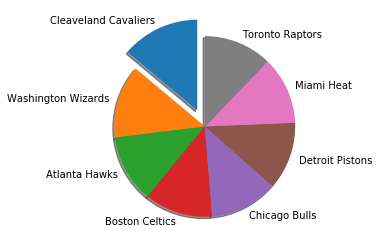

In [172]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [

'Cleaveland Cavaliers',

'Washington Wizards',

'Atlanta Hawks',

'Boston Celtics',

'Chicago Bulls',

'Detroit Pistons',

'Miami Heat',

'Toronto Raptors']
sizes = [16,15,14,14,14,14,14,14]
explode = (0.2,0,0,0,0,0,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.show()


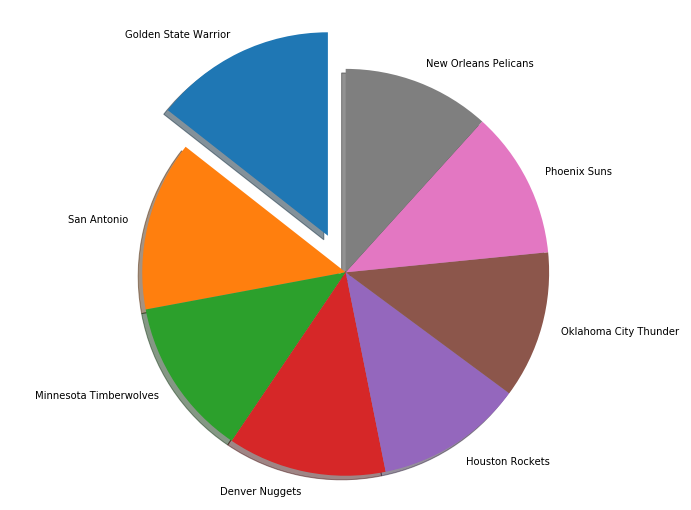

In [173]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [

'Golden State Warrior',
'San Antonio',
'Minnesota Timberwolves',
'Denver Nuggets',
'Houston Rockets',
'Oklahoma City Thunder',
'Phoenix Suns',
'New Orleans Pelicans ',
]
sizes = [16,15,14,14,13,13,13,13]
explode = (0.2,0,0,0,0,0,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


plt.show()
